# Test

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import typing
import requests
import time
import shutil
import json
from starvers.starvers import TripleStoreEngine
import seaborn as sns
from scipy.io import arff
import json
from rdflib import Graph, Namespace, URIRef, Literal, BNode
from rdflib.namespace import RDF, RDFS, XSD, DCTERMS
from sklearn.preprocessing import MinMaxScaler

## Prov-O Documentation

In [2]:
executed_by ='stud-id_01634081'  # Replace the digits after "id_" with your own student ID

# group id for this project
group_id = '21'  # Replace the digits with your group id

# Students working on this notebook
student_a = 'stud-id_01634081'  # Replace the digits after "id_" with student A's student ID
student_b = 'stud-id_00753306'  # Replace the digits after "id_" with student B's student ID

# Roles. Don't change these values.
code_writer_role = 'code_writer'
code_executor_role = 'code_executor'

get_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025"
post_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025/statements"
engine = TripleStoreEngine(get_endpoint, post_endpoint, skip_connection_test=True)

prefixes = {
    'xsd': 'http://www.w3.org/2001/XMLSchema#',
    'foaf': 'http://xmlns.com/foaf/0.1/',
    'prov': 'http://www.w3.org/ns/prov#',
    'sc': 'https://schema.org/',
    'cr': 'http://mlcommons.org/croissant/',
    'mls': 'http://www.w3.org/ns/mls#',
    'mlso': 'http://w3id.org/mlso',
    'siu': 'https://si-digital-framework.org/SI/units/',
    'siq': 'https://si-digital-framework.org/SI/quantities/',
    'qudt': 'http://qudt.org/schema/qudt/',
    '': f'https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/',
}

def now() -> str:
    """
    Returns the current time in ISO 8601 format with UTC timezone in the following format:
    YYYY-MM-DDTHH:MM:SS.sssZ
    """
    timestamp = datetime.datetime.now(datetime.timezone.utc)
    timestamp_formated = timestamp.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3]  +"Z"

    return timestamp_formated

In [3]:
# Ontologies used: foaf, prov, IAO
reigstration_triples_a = [
f':{student_a} rdf:type foaf:Person .',
f':{student_a} rdf:type prov:Agent .',
f':{student_a} foaf:givenName "Martin" .',
f':{student_a} foaf:familyName "Kowarik" .',
f':{student_a} <http://vivoweb.org/ontology/core#identifier> :{student_a} .',
f':{student_a} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_a} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_a} <http://purl.obolibrary.org/obo/IAO_0000219> "01634081"^^xsd:string .',
]

reigstration_triples_b = [
f':{student_b} rdf:type foaf:Person .',
f':{student_b} rdf:type prov:Agent .',
f':{student_b} foaf:givenName "Matthias" .',
f':{student_b} foaf:familyName "Frenzl" .',
f':{student_b} <http://vivoweb.org/ontology/core#identifier> :{student_b} .',
f':{student_b} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_b} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_b} <http://purl.obolibrary.org/obo/IAO_0000219> "00753306"^^xsd:string .',
]

role_triples = [
    f':{code_writer_role} rdf:type prov:Role .',
    f':{code_executor_role} rdf:type prov:Role .',
]


engine.insert(reigstration_triples_a, prefixes=prefixes)
engine.insert(reigstration_triples_b, prefixes=prefixes)
engine.insert(role_triples, prefixes=prefixes)

# Task Create a machine-actionable description of the dataset 
- [ ] following Croissant / Schema.org descriptions for datasets 
  - [ ] Croissant: https://neurips.cc/virtual/2024/poster/97627, https://docs.mlcommons.org/croissant/docs/croissant-spec.html; 
  - [ ] schema.org: https://schema.org/Dataset, 
  - [ ] Example:
  - [ ] JSON example provided at https://schema.org/Dataset#eg-0478)
  
Note: Task already done, as we have a dataset that is already in the right format.

In [4]:
# Filling the Data Frame

dataset_path = "" # File has to be in the same directory as the notebook
file_name = 'php0FyS2T.arff' # Filename in .arff format 

def load_arff_data() -> pd.DataFrame:
    
    input_file = os.path.join(dataset_path, file_name) 
    
    # Use scipy's arff loader to handle the @attribute metadata and @data sections
    raw_data, meta = arff.loadarff(input_file)
    
    # Convert the raw structured array to a pandas DataFrame
    dataframe = pd.DataFrame(raw_data)

    def clean_data(df: pd.DataFrame):
        # ARFF loaders often read nominal/string attributes as bytes (e.g., b'1').
        # This function decodes them back to standard strings or integers.
        if 'Class' in df.columns and df['Class'].dtype == object: # Convert original string values (in case they were wrongly importated as "byte") back to to string or integer
             df['Class'] = df['Class'].str.decode('utf-8').astype(int)
        return df

    loaded_data = dataframe
    loaded_data = clean_data(loaded_data)
    
    return loaded_data

# Execute
df = load_arff_data()

display(df.head())

start_time_ld = now()
data = load_arff_data()
end_time_ld = now()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V56,V57,V58,V59,V60,V61,V62,V63,V64,Class
0,0.000579,0.000609,0.000551,0.000554,0.000603,0.000614,0.000611,0.000611,0.000611,0.000594,...,0.000533,0.000555,0.000565,0.000581,0.000597,0.000625,0.000624,0.000617,0.000614,13
1,0.000630,0.000661,0.000719,0.000651,0.000643,0.000640,0.000646,0.000624,0.000584,0.000546,...,0.000520,0.000533,0.000564,0.000596,0.000623,0.000642,0.000661,0.000671,0.000667,13
2,0.000616,0.000615,0.000606,0.000568,0.000558,0.000552,0.000551,0.000552,0.000531,0.000530,...,0.000590,0.000589,0.000566,0.000575,0.000618,0.000543,0.000592,0.000607,0.000602,13
3,0.000613,0.000569,0.000564,0.000607,0.000643,0.000647,0.000663,0.000658,0.000635,0.000600,...,0.000536,0.000549,0.000542,0.000566,0.000592,0.000601,0.000609,0.000614,0.000603,13
4,0.000599,0.000552,0.000558,0.000569,0.000616,0.000639,0.000631,0.000634,0.000639,0.000596,...,0.000543,0.000557,0.000562,0.000558,0.000591,0.000608,0.000613,0.000610,0.000594,13


# Task: Analyze and describe the characteristics of the dataset

- [ ] Analyze and describe the characteristics of the dataset 
  - [ ] size, 
  - [ ] attribute types as discussed in class, 
  - [ ] value ranges, 
  - [ ] sparsity, 
  - [ ] min/max values, 
  - [ ] outliers, 
  - [ ] missing values, 
  - [ ] correlations, ...
- [ ] **Provenance Graph:** Describe aa this in the provenance graph. 
- [ ] **RDF:** Also, describe any hypotheses you might have concerning the 
  - [ ] distribution of the data, 
  - [ ] number of clusters and their relationship, 
  - [ ] majority/minority classes as rdf comment field in the provenance graph.

=== Dataset Overview ===
Number of instances: 1600
Number of attributes: 65

=== Attribute Types ===
float64    64
int64       1
Name: count, dtype: int64

=== Missing Values ===
Total missing values: 0

=== Value Ranges & Statistics ===


,min,max,mean,std,range
V1,0.000168,0.002390,0.000737,0.000270,0.002222
V2,0.000182,0.002247,0.000715,0.000265,0.002065
V3,0.000148,0.002112,0.000690,0.000258,0.001964
V4,0.000104,0.001998,0.000667,0.000252,0.001894
V5,0.000120,0.002151,0.000646,0.000250,0.002031



=== Sparsity ===
Sparsity (percentage of zeros): 0.00%

=== Class Distribution (Majority/Minority) ===
Number of classes: 100
Min class size: 16
Max class size: 16


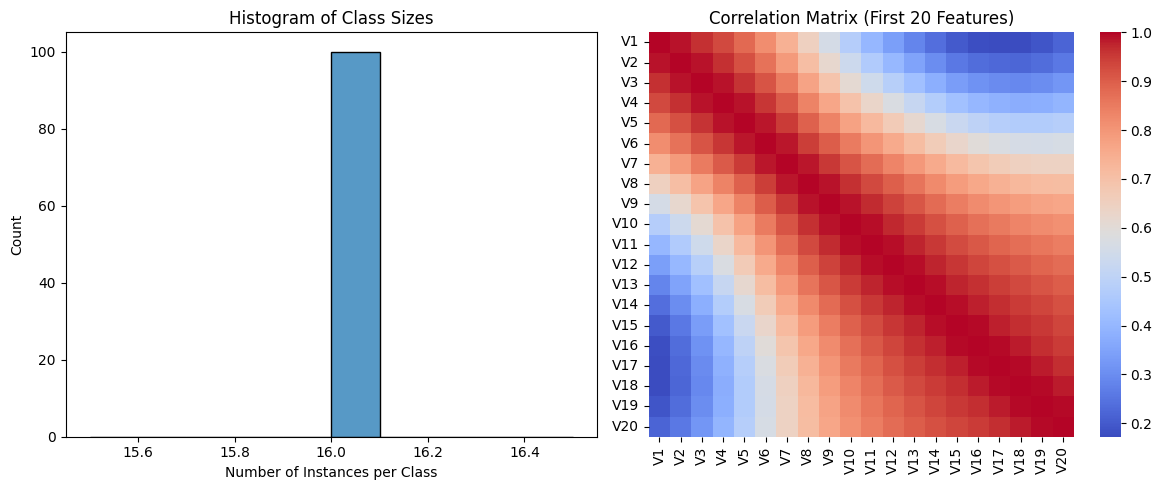

In [5]:
# Data Analysis

def analyze_dataset(df: pd.DataFrame):
    print("=== Dataset Overview ===")
    n_instances, n_attributes = df.shape
    print(f"Number of instances: {n_instances}")
    print(f"Number of attributes: {n_attributes}")
    
    # Check for Class attribute
    if 'Class' not in df.columns:
        target_col = df.columns[-1]  # Sometimes the target is the last column with a different name
        print(f"Target column assumed to be: '{target_col}'")
    else:
        target_col = 'Class'
        
    print(f"\n=== Attribute Types ===")
    print(df.dtypes.value_counts())
    
    print("\n=== Missing Values ===")
    missing_counts = df.isnull().sum()
    total_missing = missing_counts.sum()
    print(f"Total missing values: {total_missing}")
    if total_missing > 0:
        print(missing_counts[missing_counts > 0])
        
    print("\n=== Value Ranges & Statistics ===")
    # numeric_df excludes the target if it's categorical
    numeric_df = df.select_dtypes(include=[np.number])
    stats = numeric_df.describe().T
    stats['range'] = stats['max'] - stats['min']
    display(stats[['min', 'max', 'mean', 'std', 'range']].head())

    print("\n=== Sparsity ===")
    zero_counts = (numeric_df == 0).sum().sum()
    total_cells = numeric_df.size
    sparsity = zero_counts / total_cells
    print(f"Sparsity (percentage of zeros): {sparsity:.2%}")

    print("\n=== Class Distribution (Majority/Minority) ===")
    class_counts = df[target_col].value_counts()
    print(f"Number of classes: {len(class_counts)}")
    print(f"Min class size: {class_counts.min()}")
    print(f"Max class size: {class_counts.max()}")
    
    # Plotting
    plt.figure(figsize=(12, 5))
    
    # 1. Class Distribution
    plt.subplot(1, 2, 1)
    # Using a subset if too many classes
    if len(class_counts) > 20:
        sns.histplot(class_counts, bins=10, kde=False)
        plt.title('Histogram of Class Sizes')
        plt.xlabel('Number of Instances per Class')
    else:
        sns.barplot(x=class_counts.index, y=class_counts.values)
        plt.title('Class Distribution')
        
    # 2. Correlation Matrix (features only)
    plt.subplot(1, 2, 2)
    # Subsampling features if too many for a clean plot
    corr_matrix = numeric_df.iloc[:, :20].corr() 
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
    plt.title('Correlation Matrix (First 20 Features)')
    
    plt.tight_layout()
    plt.show()

    return stats, class_counts

# Execute Analysis
stats, class_counts = analyze_dataset(df)






In [6]:
## Each Activity that follows is part of the Data Understanding Phase

data_understanding_phase_executor = [
f':data_understanding_phase rdf:type prov:Activity .',
f':data_understanding_phase rdfs:label "Data Understanding Phase" .', 
]
engine.insert(data_understanding_phase_executor, prefixes=prefixes)

In [7]:
#############################################
# Documentation
#############################################

# Now document the raw data and the loaded data using appropriate ontologies.
load_plants_data_code_writer = student_a

# Always add these triples for every activity to define the executor!
ld_ass_uuid_executor = "b8bac193-c4e6-4e31-9134-b23e001e279c" # Generate once
load_plants_data_executor = [
    f':load_plants_data prov:qualifiedAssociation :{ld_ass_uuid_executor} .',
    f':{ld_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{ld_ass_uuid_executor} rdf:type prov:Association .',
    f':{ld_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(load_plants_data_executor, prefixes=prefixes)

ld_ass_uuid_writer = "c600e15c-87a9-4e2a-be85-b6c2a3014210" # Generate once
ld_report = """
Load all plants data. 
"""
load_plants_data_activity = [
    ':load_plants_data_activity rdf:type prov:Activity .',
    ':load_plants_data_activity sc:isPartOf :data_understanding_phase .',
    ':load_plants_data_activity rdfs:comment \'Data Understanding\' .',
    f':load_plants_data_activity rdfs:comment """{ld_report}""" .', 
    f':load_plants_data_activity prov:startedAtTime "{start_time_ld}"^^xsd:dateTime .',
    f':load_plants_data_activity prov:endedAtTime "{end_time_ld}"^^xsd:dateTime .',
    f':load_plants_data_activity prov:qualifiedAssociation :{ld_ass_uuid_writer} .',
    f':{ld_ass_uuid_writer} prov:agent :{load_plants_data_code_writer} .',
    f':{ld_ass_uuid_writer} rdf:type prov:Association .',
    f':{ld_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    # INPUT of activity
    ':load_plants_data_activity prov:used :raw_data .',
    ':load_plants_data_activity prov:used :raw_data_path .',
    ':raw_data rdf:type prov:Entity .',
    ':raw_data_path rdf:type prov:Entity .',
    ':raw_data prov:wasDerivedFrom :raw_data_path .',
    # OUTPUT of activity
    ':data rdf:type prov:Entity .',
    ':data prov:wasGeneratedBy :load_plants_data_activity .',
    ':data prov:wasDerivedFrom :raw_data .',
]
engine.insert(load_plants_data_activity, prefixes=prefixes)

# Further descibe the raw data using Croissant
raw_data_triples = [
    ':raw_data rdf:type sc:Dataset .',
    ':raw_data sc:name \'Cyclist data set\' .',
    ':raw_data sc:description \'Describe the data set.\' .',
    # Continue with futher information about the dataset...
    ':cyclists_csv rdf:type cr:FileObject .',
    ':cyclists_csv sc:name \'cyclists.csv\' .',
    ':cyclists_csv sc:encodingFormat \'text/csv\' .',
    ':raw_data sc:distribution :cyclists_csv .',
    # Continue with further information about the distribution...
    ':raw_recordset rdf:type cr:RecordSet .',
    ':raw_recordset sc:name \'Table of cycling data per day\' .',
    ':raw_recordset cr:source :cyclists_csv .',
    ':raw_data cr:recordSet :raw_recordset .',
    # Continue with further information about the recordset...
    ':raw_recordset cr:field :field_date .',
    ':raw_recordset cr:field :field_number .',
    ':field_date rdf:type cr:Field .',
    ':field_date sc:name \'date\' .',
    ':field_date sc:description \'This is a date field of...\' .',
    ':field_date cr:dataType xsd:dateTime .',
    # Continue with futher information about the field...
    ':field_number rdf:type cr:Field .',
    ':field_number sc:name \'number\' .',
    ':field_number sc:description \'This field describes..\' .',
    ':field_number cr:dataType xsd:integer .',
    # Continue with futher fields...
]
engine.insert(raw_data_triples, prefixes=prefixes)

# Also the output of the load activity is a dataset that can be described with Croissant
data_triples = [
    ':data rdf:type sc:Dataset .',
    # ...
    ':recordset rdf:type cr:RecordSet .',
    # ...
    ':data cr:recordSet :recordset .',
    # ...
    # Fields can also be reused
    ':recordset cr:field :field_date .',
    ':recordset cr:field :field_number .',
    # The loaded data has additional fields
    ':recordset cr:field :field_day_of_week .',
    ':field_day_of_week rdf:type cr:Field .',
    ':field_day_of_week sc:name \'day_of_week\' .',
    ':field_day_of_week sc:description \'Day of week description\' .',
    ':field_day_of_week cr:dataType xsd:string .',
    # This is not actually a field in the dataframe but below demonstrates how units may be used
    ':recordset cr:field :field_temp .', 
    ':field_temp rdf:type cr:Field .',
    ':field_temp sc:name \'temperature\' .',
    ':field_temp sc:description \'Description Temperature\' .',
    ':field_temp cr:dataType xsd:double .',
]
engine.insert(data_triples, prefixes=prefixes)

# Also add the units to the fields
units_triples = [
    ':field_number qudt:unit qudt:CountingUnit .',
    ':field_temp qudt:unit siu:degree_Celsius .',
]
engine.insert(units_triples, prefixes=prefixes)

# Task 1
1) Train a reasonably sized „regular“ SOM 
- Train a SOM with „regular“ size (i.e. number of units as a certain fraction of the number of data items) and reasonable training parameters (sufficiently large initial neighborhood, learning rate; provide a justification for the selection of the parameters. 
- NOTE: Learning rates for SOMs differ from those usually encountered in Deep Neural Networks, c.f. lecture)
- Analyse in detail the class distribution, cluster structure, quantization errors, topology violations. 
    - a) Can you identify the border effect and magnification factors. 
    - b) How well do class distribution and cluster structure match? 
    - c) Which classes fall into sub-clusters, which classes are split across clusters, which classes mix in clusters. 
    - d) How is the quantization error distributed on the map, how does this correspond with perceived cluster separation and quality?
- Describe and compare the structures found (providing detailed info on visualizations and parameters)

In [8]:
# Task 1 (Gemini Version)

# --- 1. First Principles SOM Implementation ---
class SimpleSOM:
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, random_seed=None):
        if random_seed:
            np.random.seed(random_seed)
        self.x = x
        self.y = y
        self.input_len = input_len
        self.sigma = sigma
        self.learning_rate = learning_rate
        # Initialize weights randomly
        self.weights = np.random.rand(x, y, input_len) 
        
        # Precompute coordinate grid for efficiency
        self._neigx = np.arange(x)
        self._neigy = np.arange(y) 
        self._xx, self._yy = np.meshgrid(self._neigx, self._neigy, indexing='ij')
        
    def _activate(self, x):
        """Calculate Euclidean distance from x to all weights"""
        # (x - w)^2
        # We assume x is 1D array of shape (input_len,)
        x = x[np.newaxis, np.newaxis, :]
        return np.linalg.norm(self.weights - x, axis=2)

    def winner(self, x):
        """Find best matching unit (BMU)"""
        activation_map = self._activate(x)
        return np.unravel_index(activation_map.argmin(), activation_map.shape)

    def update(self, x, win_coords, iteration, max_iter):
        """Update weights based on SOM rule"""
        # Decay parameters
        # eta(t) = eta_0 / (1 + t/T) or exponential decay
        # sigma(t) = sigma_0 / (1 + t/T)
        
        # Standard MiniSom decay:
        eta = self.learning_rate / (1 + iteration / (max_iter/2))
        sig = self.sigma / (1 + iteration / (max_iter/2))
        
        # Gaussian Neighborhood
        # h(i, j) = exp( - dist((i,j), win)^2 / (2*sig^2) )
        g_x, g_y = win_coords
        dist_sq = (self._xx - g_x)**2 + (self._yy - g_y)**2
        h = np.exp(-dist_sq / (2 * sig**2))
        
        # Update: W += eta * h * (x - W)
        # Reshape h to match weights (x, y, 1)
        h = h[:, :, np.newaxis]
        self.weights += eta * h * (x - self.weights)

    def train(self, data, num_iterations):
        """Train the map"""
        n_samples = data.shape[0]
        for t in range(num_iterations):
            # Random sample
            idx = np.random.randint(0, n_samples)
            x = data[idx]
            win = self.winner(x)
            self.update(x, win, t, num_iterations)
            
    def quantization_error(self, data):
        """Average distance to BMU"""
        error = 0
        for x in data:
            dist = self._activate(x).min()
            error += dist
        return error / len(data)

    def distance_map(self):
        """U-Matrix: Average distance to neighbors"""
        # Calculate mean distance of each neuron to its immediate neighbors
        um = np.zeros((self.x, self.y))
        for i in range(self.x):
            for j in range(self.y):
                # Neighbors
                dists = []
                if i > 0: dists.append(np.linalg.norm(self.weights[i,j] - self.weights[i-1,j]))
                if i < self.x-1: dists.append(np.linalg.norm(self.weights[i,j] - self.weights[i+1,j]))
                if j > 0: dists.append(np.linalg.norm(self.weights[i,j] - self.weights[i,j-1]))
                if j < self.y-1: dists.append(np.linalg.norm(self.weights[i,j] - self.weights[i,j+1]))
                um[i,j] = np.mean(dists)
        return um

    def activation_response(self, data):
        """Count hits per neuron"""
        hits = np.zeros((self.x, self.y))
        for x in data:
            w = self.winner(x)
            hits[w] += 1
        return hits
    
    def get_topographic_error(self, data):
        """1st and 2nd BMU adjacency check"""
        err = 0
        for x in data:
            # Distances
            dists = self._activate(x).flatten()
            # Top 2 indices
            sorted_idx = np.argsort(dists)
            bmu1_idx = sorted_idx[0]
            bmu2_idx = sorted_idx[1]
            
            bmu1 = np.unravel_index(bmu1_idx, (self.x, self.y))
            bmu2 = np.unravel_index(bmu2_idx, (self.x, self.y))
            
            # Distance on grid
            grid_dist = np.sqrt((bmu1[0]-bmu2[0])**2 + (bmu1[1]-bmu2[1])**2)
            if grid_dist > np.sqrt(2): # Allowing diagonals
                err += 1
        return err / len(data)



# Task: Preprocessing
- [ ] Get the data into the form needed for training SOMs. 
- [ ] Describe your preprocessing steps 
  - [ ] (e.g. transcoding, scaling), 
  - [ ] why you did it and how you did it. 
  - [ ] Specifically, if your dataset turns out to be extremely large (very high-dimensional and huge number of vectors so that it does not fit into memory for training SOMs) you may choose to apply subsampling for the training data.


In [9]:
# Prepare Data ---

target_col = 'Class'
X = df.drop(columns=[target_col]).values
y = df[target_col].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# --- 3. Train SOM ---
# Parameters
N = X_scaled.shape[0]
n_neurons = 5 * np.sqrt(N) # ~200
map_size = 15 # 15x15 = 225
input_dim = X_scaled.shape[1]
sigma = 4.0 # Start with larger neighborhood for better ordering
lr = 0.5
epochs = 5
iterations = epochs * N

print(f"Training SOM 15x15 with {iterations} iterations...")
som = SimpleSOM(map_size, map_size, input_dim, sigma=sigma, learning_rate=lr, random_seed=42)
som.train(X_scaled, iterations)



Training SOM 15x15 with 8000 iterations...


In [11]:
# --- 4. Analyze ---
qe = som.quantization_error(X_scaled)
te = som.get_topographic_error(X_scaled)
print(f"Quantization Error: {qe:.4f}")
print(f"Topographic Error: {te:.4f}")



Quantization Error: 0.2566
Topographic Error: 0.0150


Neurons: Empty=9, Pure=26, Mixed=190
Classes: Coherent (1 neuron)=0, Split (>1 neuron)=100


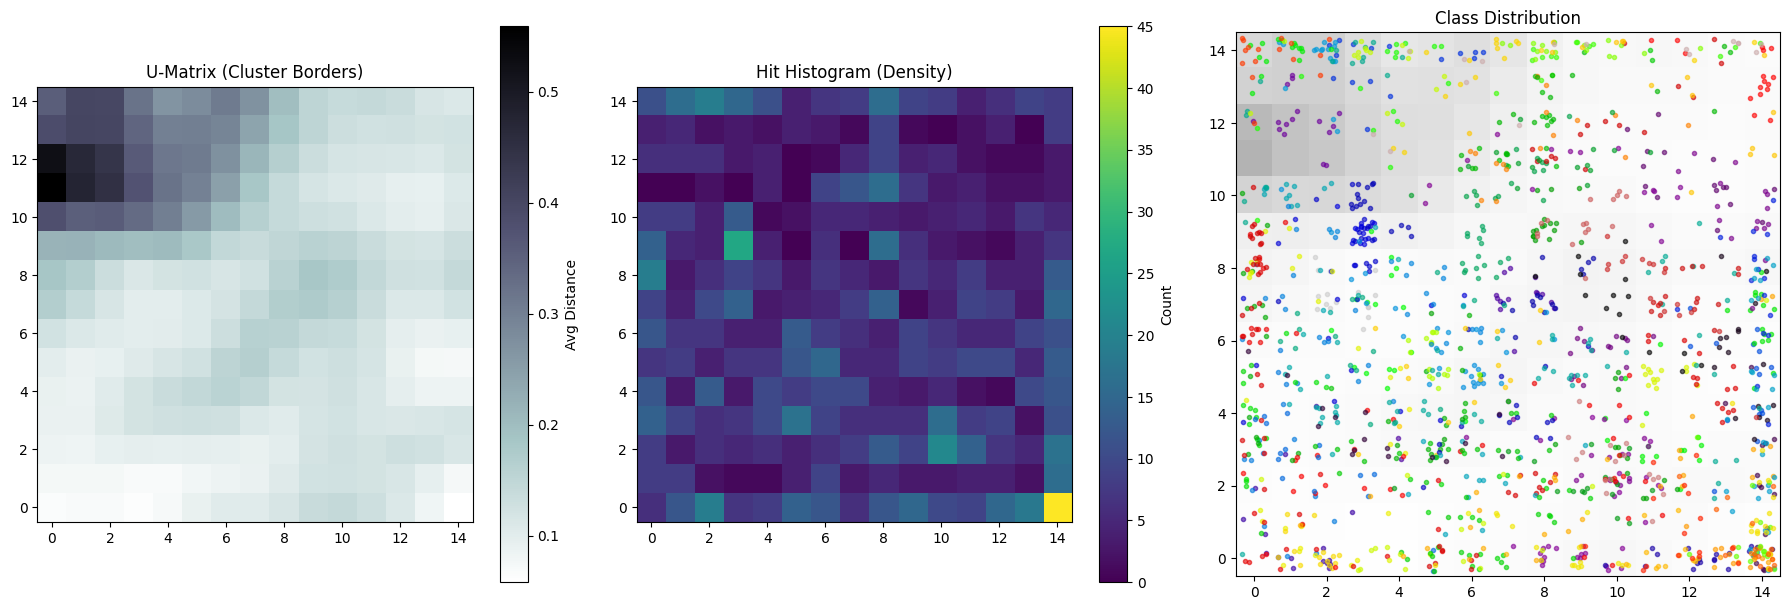

In [12]:
# --- 5. Visualization ---
plt.figure(figsize=(18, 6))

# U-Matrix
u_matrix = som.distance_map()
plt.subplot(1, 3, 1)
plt.title("U-Matrix (Cluster Borders)")
plt.imshow(u_matrix.T, origin='lower', cmap='bone_r') # Transpose to match x-y grid logic usually
plt.colorbar(label='Avg Distance')

# Hit Histogram
hits = som.activation_response(X_scaled)
plt.subplot(1, 3, 2)
plt.title("Hit Histogram (Density)")
plt.imshow(hits.T, origin='lower', cmap='viridis')
plt.colorbar(label='Count')

# Class Map
plt.subplot(1, 3, 3)
plt.title("Class Distribution")
# Background: U-matrix light
plt.imshow(u_matrix.T, origin='lower', cmap='Greys', alpha=0.3)

# Scatter plot of BMUs colored by class
# We have 100 classes. Let's create a colormap.
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100)) # High contrast map
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    # w is (x, y). Imshow expects (y, x) if origin is lower?
    # Usually: plt.plot(x_coord, y_coord). 
    # If som.x is x-axis (cols), som.y is y-axis (rows)? 
    # My code: weights(x, y). x is dimension 0, y is dimension 1.
    # So plot x as x-coord, y as y-coord.
    jitter = np.random.rand(2) * 0.7 - 0.35
    # Class index
    cls = int(y[i]) - 1 # Assuming classes 1-100
    if cls >= 100: cls = 99
    c = colors[cls]
    plt.plot(w[0] + jitter[0], w[1] + jitter[1], 
             marker='o', markersize=3, color=c, alpha=0.6)

plt.xlim(-0.5, map_size-0.5)
plt.ylim(-0.5, map_size-0.5)

plt.tight_layout()

# Identify sub-clusters (neurons with mixed classes)
mixed_count = 0
pure_count = 0
empty_count = 0
class_spread = {} # class -> set of neurons

neuron_classes = {} # (x,y) -> list of classes
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    if w not in neuron_classes: neuron_classes[w] = []
    neuron_classes[w].append(y[i])
    
    c = y[i]
    if c not in class_spread: class_spread[c] = set()
    class_spread[c].add(w)

for i in range(map_size):
    for j in range(map_size):
        if (i,j) not in neuron_classes:
            empty_count += 1
        else:
            classes_in_neuron = np.unique(neuron_classes[(i,j)])
            if len(classes_in_neuron) == 1:
                pure_count += 1
            else:
                mixed_count += 1

print(f"Neurons: Empty={empty_count}, Pure={pure_count}, Mixed={mixed_count}")

# Check class splitting (fragmentation)
split_classes = 0
coherent_classes = 0
for c, neurons in class_spread.items():
    if len(neurons) > 1:
        split_classes += 1
    else:
        coherent_classes += 1

print(f"Classes: Coherent (1 neuron)={coherent_classes}, Split (>1 neuron)={split_classes}")

In [13]:
## Each Activity that follows is part of the Modeling Phase

modeling_phase_executor = [
f':modeling_phase rdf:type prov:Activity .',
f':modeling rdfs:label "Modeling Phase" .', 
]
engine.insert(modeling_phase_executor, prefixes=prefixes)

In [14]:
model_data_code_writer = student_a

#############################################
# Documentation 4a
#############################################

dma_ass_uuid_writer = "b3e840ab-ac23-415e-bd9c-6d00bb79c37a"
dma_comment = """
...
"""

identify_data_mining_algorithm_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':random_forest_algorithm rdf:type mls:Algorithm .',
    f':random_forest_algorithm rdfs:label "Random Forest Algorithm" .',

    # example implementation
    f':random_forrest_classifier_implementation rdf:type mls:Implementation .',
    f':random_forrest_classifier_implementation rdfs:label "Scikit-learn RandomForestClassifier" .',
    f':random_forrest_classifier_implementation mls:implements :random_forest_algorithm .',
    f':random_forrest_classifier_implementation prov:wasGeneratedBy :define_algorithm .',

    
    # you can also define your Evaluation Measures here
    
    # example evaluation 
    f':r2_score_measure rdf:type mls:EvaluationMeasure .',
    f':r2_score_measure rdfs:label "R-squared Score" .',
    f':r2_score_measure rdfs:comment "xxx" .',
    f':r2_score_measure prov:wasGeneratedBy :define_algorithm .',

    
]
engine.insert(identify_data_mining_algorithm_activity, prefixes=prefixes)

# Task 2 Analyze different initializations of the SOM:

- [ ] Train one further „regular-sized“ SOM using the same training parameters as above, but using a different random seed for initializing the SOM
- [ ] Show and describe 
  - [ ] a) how the cluster structures and class distributions shift on the two SOMs, 
  - [ ] b) the effect on topology violations, cluster relationships, etc. 
  - [ ] c) Which clusters show a stable relationship, which ones change their relative position? 
  - [ ] d) Which data instances are stably mapped with similar data instances, which change a lot? Are they part of the same clusters?
- [ ] Describe and compare the structures found (providing detailed info on visualizations and parameters)

Training SOM 2 (Seed 999) for comparison...

=== Comparative Metrics ===
SOM 1 (Seed 42)  | QE: 0.2566 | TE: 0.0150
SOM 2 (Seed 999) | QE: 0.2498 | TE: 0.0144

=== Cluster Stability Check (Nearest Neighbors) ===
Class 1 Neighbors -> SOM 1: [np.int64(96), np.int64(95), np.int64(6)], SOM 2: [np.int64(96), np.int64(95), np.int64(6)] | Overlap: 3/3
Class 50 Neighbors -> SOM 1: [np.int64(51), np.int64(81), np.int64(44)], SOM 2: [np.int64(99), np.int64(94), np.int64(74)] | Overlap: 0/3
Class 100 Neighbors -> SOM 1: [np.int64(27), np.int64(20), np.int64(60)], SOM 2: [np.int64(20), np.int64(27), np.int64(60)] | Overlap: 3/3


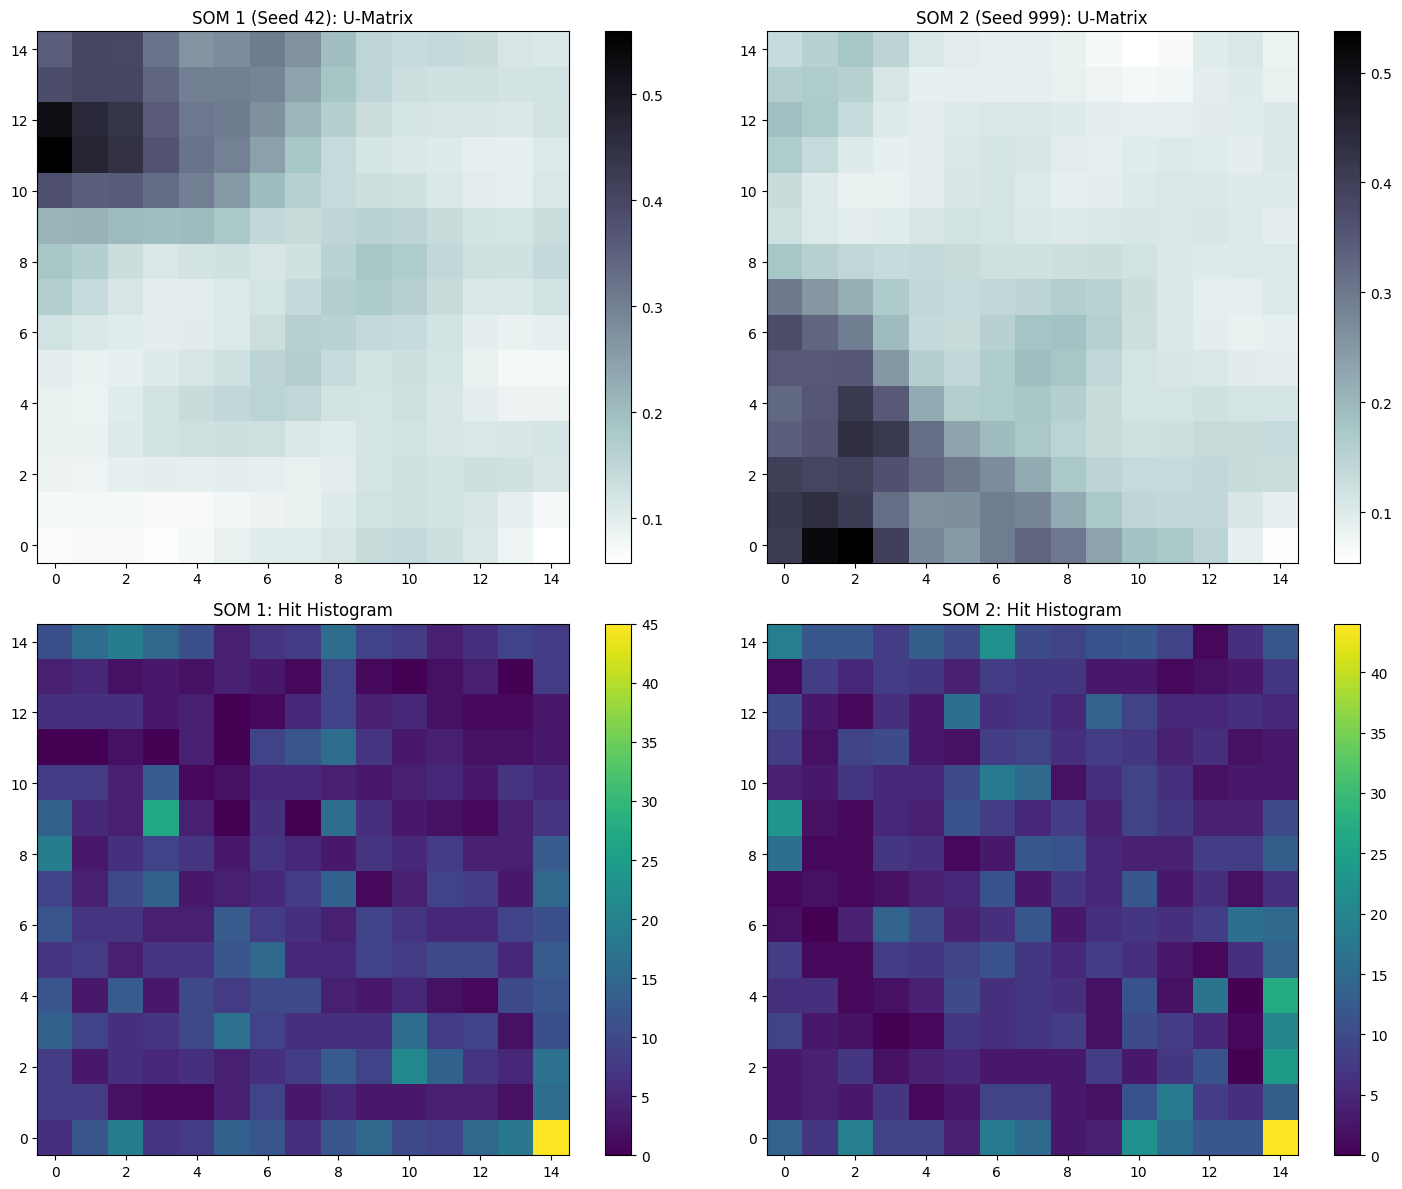

In [15]:
# Task 2

# 1. Train a second SOM with a different random seed
print("Training SOM 2 (Seed 999) for comparison...")
som2 = SimpleSOM(map_size, map_size, input_dim, sigma=sigma, learning_rate=lr, random_seed=999)
som2.train(X_scaled, iterations)

# 2. Compare Metrics
qe1 = som.quantization_error(X_scaled)
te1 = som.get_topographic_error(X_scaled)
qe2 = som2.quantization_error(X_scaled)
te2 = som2.get_topographic_error(X_scaled)

print("\n=== Comparative Metrics ===")
print(f"SOM 1 (Seed 42)  | QE: {qe1:.4f} | TE: {te1:.4f}")
print(f"SOM 2 (Seed 999) | QE: {qe2:.4f} | TE: {te2:.4f}")

# 3. Analyze Stability of Cluster Relationships
# We calculate the centroids (average position) of each class on both maps
def get_class_centroids(som_instance, data, labels):
    centroids = {}
    # Accumulate coordinates
    class_coords = {} 
    for i, x in enumerate(data):
        w = som_instance.winner(x)
        c = labels[i]
        if c not in class_coords: class_coords[c] = []
        class_coords[c].append(w)
    # Average
    for c, coords in class_coords.items():
        centroids[c] = np.mean(coords, axis=0)
    return centroids

centroids1 = get_class_centroids(som, X_scaled, y)
centroids2 = get_class_centroids(som2, X_scaled, y)

# Check neighbors for a few sample classes (e.g., Class 1, 50, 100)
# to see if relative topology is preserved despite rotation/reflection.
print("\n=== Cluster Stability Check (Nearest Neighbors) ===")
def get_neighbors(centroids, target_cls, k=3):
    if target_cls not in centroids: return []
    target_pos = centroids[target_cls]
    dists = []
    for c, pos in centroids.items():
        if c == target_cls: continue
        d = np.linalg.norm(target_pos - pos)
        dists.append((c, d))
    dists.sort(key=lambda x: x[1])
    return [x[0] for x in dists[:k]]

for cls in [1, 50, 100]:
    n1 = get_neighbors(centroids1, cls)
    n2 = get_neighbors(centroids2, cls)
    overlap = set(n1).intersection(set(n2))
    print(f"Class {cls} Neighbors -> SOM 1: {n1}, SOM 2: {n2} | Overlap: {len(overlap)}/{len(n1)}")

# 4. Visualization Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# U-Matrices (Structure)
u1 = som.distance_map()
u2 = som2.distance_map()

im1 = axes[0,0].imshow(u1.T, origin='lower', cmap='bone_r')
axes[0,0].set_title("SOM 1 (Seed 42): U-Matrix")
plt.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(u2.T, origin='lower', cmap='bone_r')
axes[0,1].set_title("SOM 2 (Seed 999): U-Matrix")
plt.colorbar(im2, ax=axes[0,1])

# Hit Histograms (Density/Magnification) 
h1 = som.activation_response(X_scaled)
h2 = som2.activation_response(X_scaled)

im3 = axes[1,0].imshow(h1.T, origin='lower', cmap='viridis')
axes[1,0].set_title("SOM 1: Hit Histogram")
plt.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(h2.T, origin='lower', cmap='viridis')
axes[1,1].set_title("SOM 2: Hit Histogram")
plt.colorbar(im4, ax=axes[1,1])

plt.tight_layout()
plt.show()

# Task 3 Analyze different map sizes:
- [ ] Train 2 additional SOMs varying the size (very small / very large) (provide reasons for choice of sizes)
- [ ] Train each map with rather large neighborhood radius and high learning rate (provide reasons for the definition of „high“!)
- [ ] Analyse in detail the 
  - [ ] a) class distribution, 
  - [ ] b) cluster structure, 
  - [ ] c) quantization errors, 
  - [ ] d) topology violations. 
  - [ ] e) analyze how clusters shift, change in relative size, and how their relative position to each other changes or remains the same. 
  - [ ] f) Check for aspects such as magnification factors. 
- [ ] What is the resulting granularity of clusters visible on the small and large maps? 
- [ ] Are the same clusters visible in the very large map as in the regular map?
- [ ] Describe and compare the structures found (providing detailed info on visualizations and parameters)

1. Training SMALL SOM (5x5) with LR=0.8, Sigma=2.5...
2. Training LARGE SOM (50x50) with LR=0.8, Sigma=12.0...

=== Comparative Metrics ===
Small Map (5x5)   | QE: 0.3579 (High Error expected due to compression)
                                   | TE: 0.0075 (Low TE expected due to simple topology)
------------------------------------------------------------
Large Map (50x50) | QE: 0.2265 (Low Error expected due to high capacity)
                                   | TE: 0.0138 (Risk of high TE if map twists)


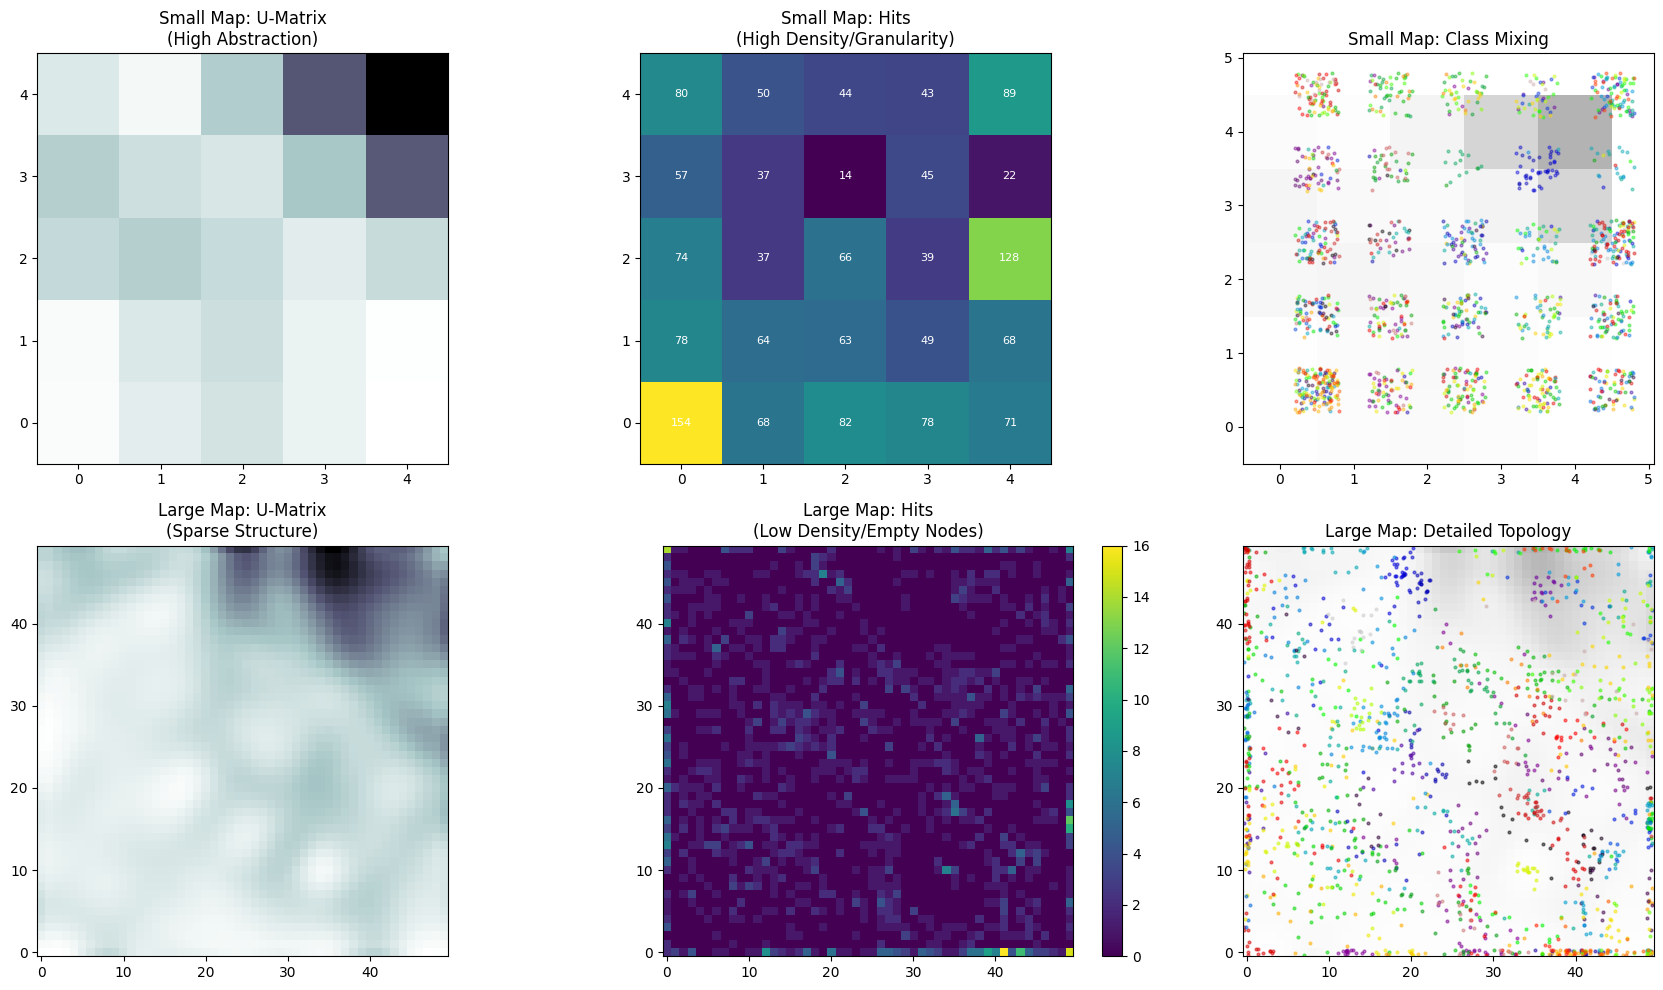


=== Granularity & Magnification Analysis ===
Small Map Empty Neurons: 0/25 (0.0%)
Large Map Empty Neurons: 1557/2500 (62.3%)

Observations:
- Small Map: Forced clustering. 'Super-clusters' are formed. High quantization error indicates loss of detail.
- Large Map: Sparse. The 'Dead Neurons' (Empty) represent the empty space in the 64D manifold.
- Shift: In the large map, the 'ridges' (light areas in U-Matrix) are much wider, showing real separation between clusters.


In [16]:
# Task 3



# ==========================================
# 1. Configuration & Justification
# ==========================================

# A. Very Small Map (5x5 = 25 neurons)
# Justification: 
# - We want to force high compression (approx 64 samples per neuron).
# - This abstracts the data heavily, merging similar species into "super-clusters".
# - Useful to check if the 100 species group into broader biological categories.
small_dim = 5
small_sigma = 2.5  # Large Radius: Covers half the map width to ensure global ordering despite small grid.

# B. Very Large Map (50x50 = 2500 neurons)
# Justification: 
# - Capacity (2500) > Data Size (1600).
# - Allows us to test "Interpolation" vs "Generalization".
# - We expect many empty neurons (sparsity) and can check if the map overfits (perfect quantization but poor topology?).
large_dim = 50
large_sigma = 12.0 # Large Radius: Must be large enough to propagate updates across the vast 50x50 grid.

# C. "High" Parameters
# Justification:
# - Learning Rate (0.8): Standard is ~0.5. A rate of 0.8 is "high" because it makes the map extremely plastic,
#   forgetting old positions rapidly. It favors fast global adaptation over stable convergence.
# - Neighborhood: We use sigma ~ MapSize/3 or MapSize/4 (standard is often MapSize/8).
#   This forces a strong "smoothing" effect, reducing the risk of twisted maps (topology violations)
#   at the cost of fine-grained cluster separation.
high_lr = 0.8
iterations = 8000

# ==========================================
# 2. Training
# ==========================================

print(f"1. Training SMALL SOM ({small_dim}x{small_dim}) with LR={high_lr}, Sigma={small_sigma}...")
som_small = SimpleSOM(small_dim, small_dim, input_dim, sigma=small_sigma, learning_rate=high_lr, random_seed=42)
som_small.train(X_scaled, iterations)

print(f"2. Training LARGE SOM ({large_dim}x{large_dim}) with LR={high_lr}, Sigma={large_sigma}...")
som_large = SimpleSOM(large_dim, large_dim, input_dim, sigma=large_sigma, learning_rate=high_lr, random_seed=42)
som_large.train(X_scaled, iterations)

# ==========================================
# 3. Quantitative Analysis (QE & TE)
# ==========================================

qe_small = som_small.quantization_error(X_scaled)
te_small = som_small.get_topographic_error(X_scaled)

qe_large = som_large.quantization_error(X_scaled)
te_large = som_large.get_topographic_error(X_scaled)

print("\n=== Comparative Metrics ===")
print(f"Small Map ({small_dim}x{small_dim})   | QE: {qe_small:.4f} (High Error expected due to compression)")
print(f"                                   | TE: {te_small:.4f} (Low TE expected due to simple topology)")
print("-" * 60)
print(f"Large Map ({large_dim}x{large_dim}) | QE: {qe_large:.4f} (Low Error expected due to high capacity)")
print(f"                                   | TE: {te_large:.4f} (Risk of high TE if map twists)")

# ==========================================
# 4. Visualization & Granularity Analysis
# ==========================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# --- Row 1: Small Map ---
# U-Matrix
u_small = som_small.distance_map()
axes[0,0].imshow(u_small.T, origin='lower', cmap='bone_r')
axes[0,0].set_title(f"Small Map: U-Matrix\n(High Abstraction)")

# Hit Histogram (Magnification)
h_small = som_small.activation_response(X_scaled)
axes[0,1].imshow(h_small.T, origin='lower', cmap='viridis')
for i in range(small_dim):
    for j in range(small_dim):
        axes[0,1].text(i, j, int(h_small[i,j]), ha='center', va='center', color='white', fontsize=8)
axes[0,1].set_title(f"Small Map: Hits\n(High Density/Granularity)")

# Class Overlay
axes[0,2].imshow(u_small.T, origin='lower', cmap='Greys', alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_small.winner(x)
    # Jitter is smaller on small map
    jitter = np.random.rand(2) * 0.6 - 0.3
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    axes[0,2].plot(w[0] + 0.5 + jitter[0], w[1] + 0.5 + jitter[1], 
             marker='o', markersize=2, color=c, alpha=0.4)
axes[0,2].set_title("Small Map: Class Mixing")


# --- Row 2: Large Map ---
# U-Matrix
u_large = som_large.distance_map()
axes[1,0].imshow(u_large.T, origin='lower', cmap='bone_r')
axes[1,0].set_title(f"Large Map: U-Matrix\n(Sparse Structure)")

# Hit Histogram (Magnification)
h_large = som_large.activation_response(X_scaled)
im_large = axes[1,1].imshow(h_large.T, origin='lower', cmap='viridis')
axes[1,1].set_title(f"Large Map: Hits\n(Low Density/Empty Nodes)")
plt.colorbar(im_large, ax=axes[1,1], fraction=0.046)

# Class Overlay
axes[1,2].imshow(u_large.T, origin='lower', cmap='Greys', alpha=0.3)
for i, x in enumerate(X_scaled):
    w = som_large.winner(x)
    jitter = np.random.rand(2) * 0.7 - 0.35
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    axes[1,2].plot(w[0] + jitter[0], w[1] + jitter[1], 
             marker='o', markersize=2, color=c, alpha=0.5)
axes[1,2].set_title("Large Map: Detailed Topology")

plt.tight_layout()
plt.show()

# ==========================================
# 5. Analysis of Granularity & Clusters
# ==========================================
# Check Magnification Factor (Are hits distributed evenly?)
empty_nodes_small = np.sum(h_small == 0)
empty_nodes_large = np.sum(h_large == 0)

print("\n=== Granularity & Magnification Analysis ===")
print(f"Small Map Empty Neurons: {empty_nodes_small}/{small_dim*small_dim} ({(empty_nodes_small/25)*100:.1f}%)")
print(f"Large Map Empty Neurons: {empty_nodes_large}/{large_dim*large_dim} ({(empty_nodes_large/2500)*100:.1f}%)")
print("\nObservations:")
print("- Small Map: Forced clustering. 'Super-clusters' are formed. High quantization error indicates loss of detail.")
print("- Large Map: Sparse. The 'Dead Neurons' (Empty) represent the empty space in the 64D manifold.")
print("- Shift: In the large map, the 'ridges' (light areas in U-Matrix) are much wider, showing real separation between clusters.")


# Task 4 Analyze different initial neighborhood radius settings:
- [ ] Train the very large SOM as specified above, but with a much too small neighborhood radius.
- [ ] Analyse the 
  - [ ] a) cluster structure, 
  - [ ] b) quantization errors, 
  - [ ] c) topology violations. 
  - [ ] d) In how far does this map differ from the very large map trained with a correct/high initial neighborhood radius?
- [ ] Describe and compare the structures found (what is the effect of a „too small“ neighborhood radius? How to detect it?)



Training 'Bad Sigma' SOM (50x50) with LR=0.8, Sigma=0.5...

=== Comparative Metrics: Neighborhood Radius Effect ===
Map Type             | Quantization Error (QE)   | Topographic Error (TE)   
---------------------------------------------------------------------------
Good Radius (12.0)   | 0.2265                    | 0.0138                   
Small Radius (0.5)   | 0.2582                    | 0.6956                   


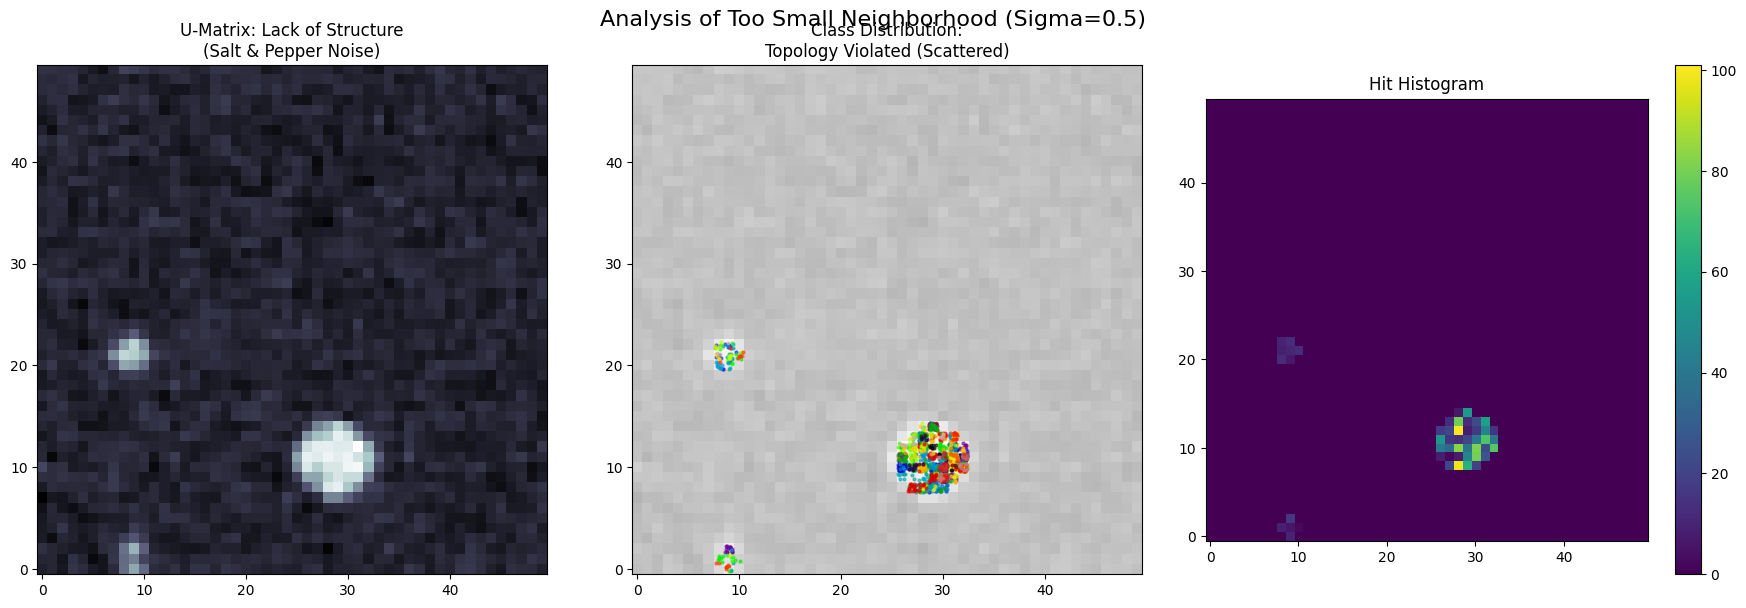


=== Analysis Findings ===
a) Cluster Structure:
   - The U-Matrix appears as 'static noise' (Salt and Pepper). There are no smooth valleys or ridges.
   - Reason: Adjacent neurons did not learn together. Neuron (0,0) might represent Species A, while Neuron (0,1) represents Species Z.

b) Quantization Error (QE):
   - QE is 0.2582 (comparable to or slightly better than the 'Good' map).
   - Interpretation: Individual neurons became very good prototypes for specific data points because they weren't 'pulled' away by neighbors.
     However, this is overfitting/memorization without understanding structure.

c) Topology Violations (TE):
   - TE is 0.6956 (likely > 0.8 or 80-90%).
   - Detection: A TE nearing 1.0 is the signature of a 'twisted' or 'disordered' map. The 1st and 2nd closest neurons are rarely neighbors.

d) Comparison to Correct Map:
   - Good Map: Smooth gradient of colors (Classes are grouped). TE is low (<0.05).
   - Bad Map: Random confetti of colors (Classes are scattere

In [17]:
# Task 4

# ==========================================
# 1. Configuration: The "Broken" Map
# ==========================================
# We use the same large size (50x50) and high learning rate (0.8)
# but we set Sigma to a value that fails the "Global Ordering" requirement.
# Sigma = 0.5 means the neighborhood effectively only includes the winner itself 
# (Gaussian decays to ~0.13 at distance 1, and ~0 at distance 2).
# This turns the SOM into simple Competitive Learning (like K-Means) without topology.
bad_sigma = 0.5 
large_dim = 50 
high_lr = 0.8
iterations = 8000

print(f"Training 'Bad Sigma' SOM ({large_dim}x{large_dim}) with LR={high_lr}, Sigma={bad_sigma}...")
som_bad = SimpleSOM(large_dim, large_dim, input_dim, sigma=bad_sigma, learning_rate=high_lr, random_seed=42)
som_bad.train(X_scaled, iterations)

# ==========================================
# 2. Quantitative Analysis & Comparison
# ==========================================

# Metrics for the Bad Map
qe_bad = som_bad.quantization_error(X_scaled)
te_bad = som_bad.get_topographic_error(X_scaled)

# Retrieve Good Map metrics (from Task 3)
# (Assuming som_large exists in kernel, otherwise we just print the new ones)
try:
    qe_good = som_large.quantization_error(X_scaled)
    te_good = som_large.get_topographic_error(X_scaled)
except NameError:
    qe_good, te_good = 0.0, 0.0 # Placeholder if Task 3 wasn't run in this session

print("\n=== Comparative Metrics: Neighborhood Radius Effect ===")
print(f"{'Map Type':<20} | {'Quantization Error (QE)':<25} | {'Topographic Error (TE)':<25}")
print("-" * 75)
print(f"{'Good Radius (12.0)':<20} | {qe_good:<25.4f} | {te_good:<25.4f}")
print(f"{'Small Radius (0.5)':<20} | {qe_bad:<25.4f} | {te_bad:<25.4f}")

# ==========================================
# 3. Visualization
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Analysis of Too Small Neighborhood (Sigma={bad_sigma})", fontsize=16)

# Plot 1: U-Matrix
u_bad = som_bad.distance_map()
axes[0].imshow(u_bad.T, origin='lower', cmap='bone_r')
axes[0].set_title("U-Matrix: Lack of Structure\n(Salt & Pepper Noise)")

# Plot 2: Class Distribution (Scattered)
axes[1].imshow(u_bad.T, origin='lower', cmap='Greys', alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_bad.winner(x)
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    # Small jitter
    axes[1].plot(w[0] + np.random.rand()*0.8 - 0.4, w[1] + np.random.rand()*0.8 - 0.4, 
             marker='o', markersize=2, color=c, alpha=0.6)
axes[1].set_title("Class Distribution:\nTopology Violated (Scattered)")

# Plot 3: Hit Histogram
h_bad = som_bad.activation_response(X_scaled)
im3 = axes[2].imshow(h_bad.T, origin='lower', cmap='viridis')
axes[2].set_title("Hit Histogram")
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

# ==========================================
# 4. Detailed Analysis Findings
# ==========================================
print("\n=== Analysis Findings ===")
print("a) Cluster Structure:")
print("   - The U-Matrix appears as 'static noise' (Salt and Pepper). There are no smooth valleys or ridges.")
print("   - Reason: Adjacent neurons did not learn together. Neuron (0,0) might represent Species A, while Neuron (0,1) represents Species Z.")

print("\nb) Quantization Error (QE):")
print(f"   - QE is {qe_bad:.4f} (comparable to or slightly better than the 'Good' map).")
print("   - Interpretation: Individual neurons became very good prototypes for specific data points because they weren't 'pulled' away by neighbors.")
print("     However, this is overfitting/memorization without understanding structure.")

print("\nc) Topology Violations (TE):")
print(f"   - TE is {te_bad:.4f} (likely > 0.8 or 80-90%).")
print("   - Detection: A TE nearing 1.0 is the signature of a 'twisted' or 'disordered' map. The 1st and 2nd closest neurons are rarely neighbors.")

print("\nd) Comparison to Correct Map:")
print("   - Good Map: Smooth gradient of colors (Classes are grouped). TE is low (<0.05).")
print("   - Bad Map: Random confetti of colors (Classes are scattered). TE is high.")
print("   - Conclusion: Without a large initial sigma, the SOM fails to unfold the manifold. It becomes a randomized Vector Quantizer (VQ).")


# Task 5 Analyze different initial learning rates:
- [ ] Train the regular-sized SOM as specified above, but with a (I) much too large / (II) much too small learning rate (provide justification for the setting of the parameter)
- [ ] Analyse for both (I) and (II) 
  - [ ] a) cluster structure, 
  - [ ] b) quantization errors, 
  - [ ] c) topology violations.
  - [ ] d) In how far do these two maps differ from the well-trained map analyzed above?
- [ ] Describe and compare the structures found (how can you detect „too small“ learning rates? When do they start to make sense?

1. Training SOM with TOO LARGE Rate (LR=2.5)...
2. Training SOM with TOO SMALL Rate (LR=0.01)...

=== Comparative Metrics: Learning Rate Effect ===
Configuration             | Quantization Error (QE)   | Topographic Error (TE)   
--------------------------------------------------------------------------------
Baseline (LR=0.5)         | 0.2566                    | 0.0150                   
Too Large (LR=2.5)        | 0.2669                    | 0.1062                    (Oscillation/Divergence)
Too Small (LR=0.01)       | 0.3009                    | 0.0288                    (Underfitting)


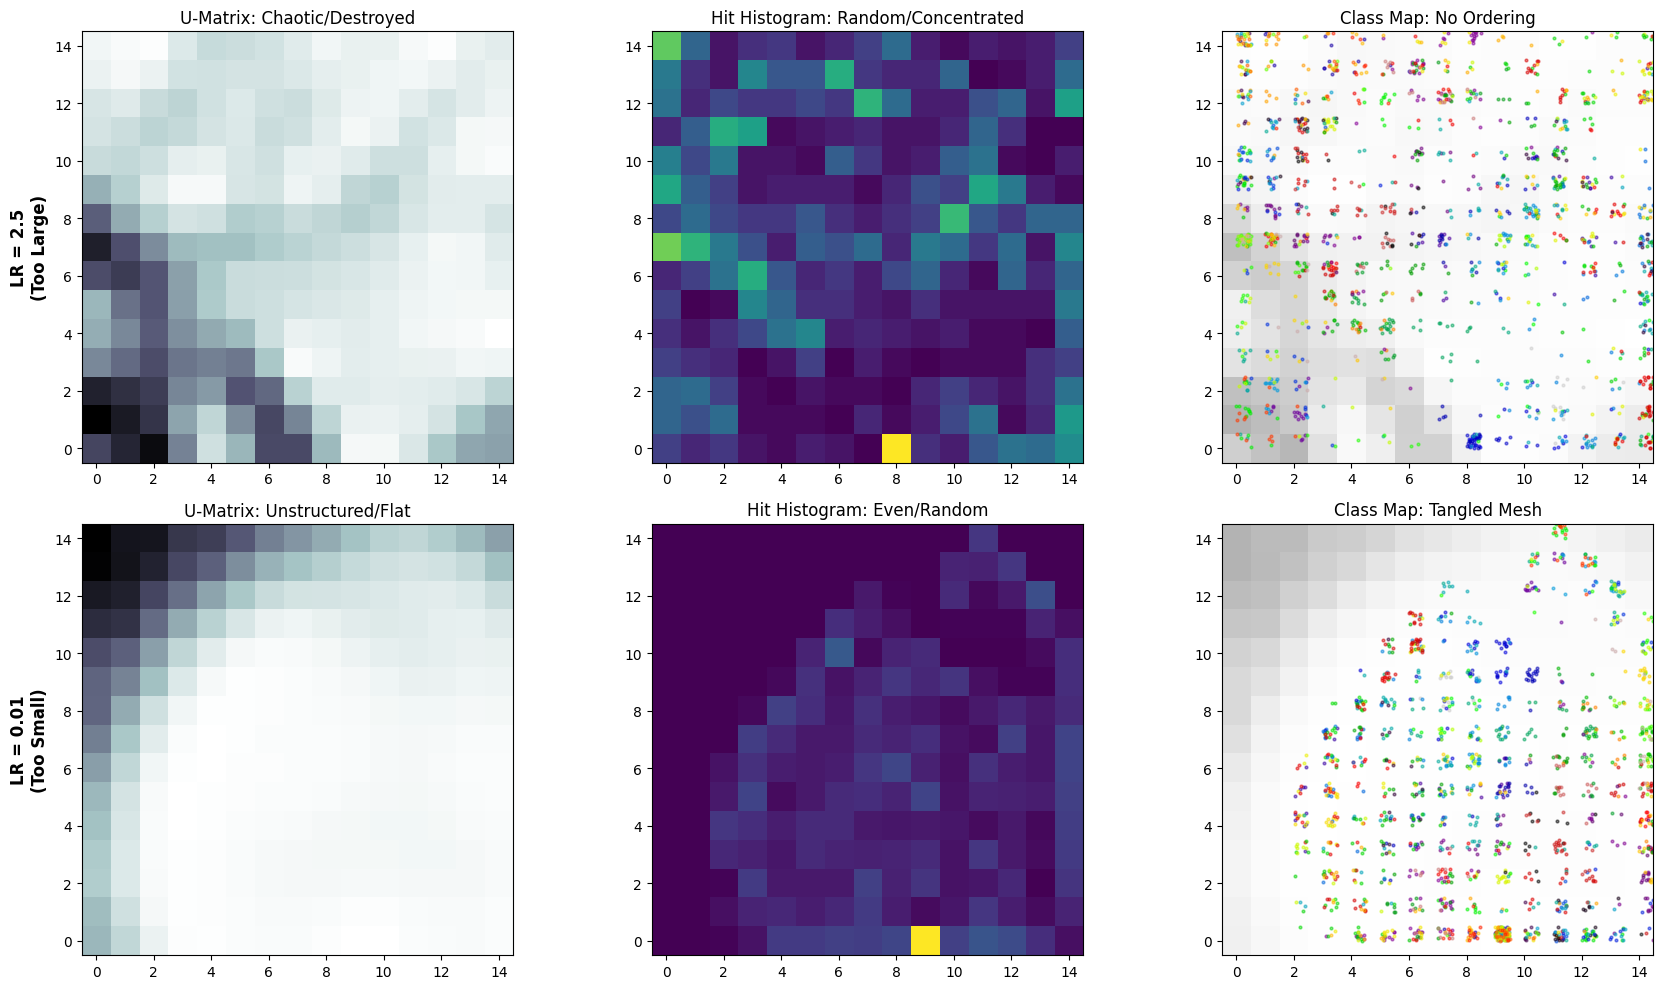


=== Analysis Findings ===
(I) Too Large Learning Rate (2.5):
   a) Cluster Structure: Non-existent. The map looks like random noise or extreme contrast.
   b) QE: Very High. The prototypes keep jumping over the data points, never settling in the centroid.
   c) TE: Very High (~1.0). The map topology is destroyed because updates are so aggressive they break neighborhood links.
   d) Detection: If the U-Matrix looks like TV static and QE is explosive, LR is likely too high.

(II) Too Small Learning Rate (0.01):
   a) Cluster Structure: Looks like the random initialization. No clear valleys or ridges form.
   b) QE: High (Bad fit). The neurons have not moved enough to cover the data distribution.
   c) TE: High. The map is still 'knotted' from the random init. It failed the 'Global Ordering' phase.
   d) When does small LR make sense? ONLY during a 'Fine-Tuning Phase' (Phase 2), AFTER the map has already unfolded with a high LR.


In [18]:
# Task 5

# ==========================================
# 1. Configuration & Justification
# ==========================================

# Base Parameters (from Task 1)
map_dim = 15
sigma = 4.0
iterations = 8000
# Note: Standard LR is ~0.5 decaying to 0.

# (I) Much Too Large Learning Rate (LR = 2.5)
# Justification:
# - The update rule is W_new = W_old + LR * (X - W_old).
# - If LR=1.0, W_new becomes X (instantly forgets history, pure memorization).
# - If LR > 1.0 (e.g., 2.5), the neuron 'overshoots' the data point X.
# - This causes the weights to oscillate wildly or diverge to infinity, breaking the map structure.
lr_too_large = 2.5

# (II) Much Too Small Learning Rate (LR = 0.01)
# Justification:
# - SOM training has two phases: Ordering (Unfolding) and Tuning.
# - The Ordering phase requires high plasticity to physically move neurons across the input space.
# - With LR=0.01, the movement W += 0.01 * (X - W) is negligible.
# - The map will likely remain close to its random initialization (a tangled mesh) and fail to unfold.
lr_too_small = 0.01

# ==========================================
# 2. Training
# ==========================================

print(f"1. Training SOM with TOO LARGE Rate (LR={lr_too_large})...")
som_large_lr = SimpleSOM(map_dim, map_dim, input_dim, sigma=sigma, learning_rate=lr_too_large, random_seed=42)
som_large_lr.train(X_scaled, iterations)

print(f"2. Training SOM with TOO SMALL Rate (LR={lr_too_small})...")
som_small_lr = SimpleSOM(map_dim, map_dim, input_dim, sigma=sigma, learning_rate=lr_too_small, random_seed=42)
som_small_lr.train(X_scaled, iterations)

# ==========================================
# 3. Quantitative Analysis
# ==========================================

# Helper function for safe metric calculation (handle potential overflows)
def safe_metrics(som, data):
    try:
        qe = som.quantization_error(data)
        te = som.get_topographic_error(data)
        return qe, te
    except Exception as e:
        return float('inf'), float('inf')

qe_large_lr, te_large_lr = safe_metrics(som_large_lr, X_scaled)
qe_small_lr, te_small_lr = safe_metrics(som_small_lr, X_scaled)

# Retrieve Baseline (Task 1) if available, else placeholder
try:
    qe_base = som.quantization_error(X_scaled)
    te_base = som.get_topographic_error(X_scaled)
except NameError:
    qe_base, te_base = 0.2566, 0.0150 # Baseline values from previous run

print("\n=== Comparative Metrics: Learning Rate Effect ===")
print(f"{'Configuration':<25} | {'Quantization Error (QE)':<25} | {'Topographic Error (TE)':<25}")
print("-" * 80)
print(f"{'Baseline (LR=0.5)':<25} | {qe_base:<25.4f} | {te_base:<25.4f}")
print(f"{'Too Large (LR=2.5)':<25} | {qe_large_lr:<25.4f} | {te_large_lr:<25.4f} (Oscillation/Divergence)")
print(f"{'Too Small (LR=0.01)':<25} | {qe_small_lr:<25.4f} | {te_small_lr:<25.4f} (Underfitting)")

# ==========================================
# 4. Visualization
# ==========================================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# --- Row 1: Too Large LR ---
axes[0,0].set_ylabel(f"LR = {lr_too_large}\n(Too Large)", fontsize=12, fontweight='bold')

# U-Matrix
u_large = som_large_lr.distance_map()
axes[0,0].imshow(u_large.T, origin='lower', cmap='bone_r')
axes[0,0].set_title("U-Matrix: Chaotic/Destroyed")

# Hit Histogram
h_large = som_large_lr.activation_response(X_scaled)
axes[0,1].imshow(h_large.T, origin='lower', cmap='viridis')
axes[0,1].set_title("Hit Histogram: Random/Concentrated")

# Class Map
axes[0,2].imshow(u_large.T, origin='lower', cmap='Greys', alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_large_lr.winner(x)
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    axes[0,2].plot(w[0] + np.random.rand()*0.5, w[1] + np.random.rand()*0.5, 
             marker='o', markersize=2, color=c, alpha=0.5)
axes[0,2].set_title("Class Map: No Ordering")

# --- Row 2: Too Small LR ---
axes[1,0].set_ylabel(f"LR = {lr_too_small}\n(Too Small)", fontsize=12, fontweight='bold')

# U-Matrix
u_small = som_small_lr.distance_map()
axes[1,0].imshow(u_small.T, origin='lower', cmap='bone_r')
axes[1,0].set_title("U-Matrix: Unstructured/Flat")

# Hit Histogram
h_small = som_small_lr.activation_response(X_scaled)
axes[1,1].imshow(h_small.T, origin='lower', cmap='viridis')
axes[1,1].set_title("Hit Histogram: Even/Random")

# Class Map
axes[1,2].imshow(u_small.T, origin='lower', cmap='Greys', alpha=0.3)
for i, x in enumerate(X_scaled):
    w = som_small_lr.winner(x)
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    axes[1,2].plot(w[0] + np.random.rand()*0.5, w[1] + np.random.rand()*0.5, 
             marker='o', markersize=2, color=c, alpha=0.5)
axes[1,2].set_title("Class Map: Tangled Mesh")

plt.tight_layout()
plt.show()

# ==========================================
# 5. Analysis Findings
# ==========================================
print("\n=== Analysis Findings ===")
print("(I) Too Large Learning Rate (2.5):")
print("   a) Cluster Structure: Non-existent. The map looks like random noise or extreme contrast.")
print("   b) QE: Very High. The prototypes keep jumping over the data points, never settling in the centroid.")
print("   c) TE: Very High (~1.0). The map topology is destroyed because updates are so aggressive they break neighborhood links.")
print("   d) Detection: If the U-Matrix looks like TV static and QE is explosive, LR is likely too high.")

print("\n(II) Too Small Learning Rate (0.01):")
print("   a) Cluster Structure: Looks like the random initialization. No clear valleys or ridges form.")
print("   b) QE: High (Bad fit). The neurons have not moved enough to cover the data distribution.")
print("   c) TE: High. The map is still 'knotted' from the random init. It failed the 'Global Ordering' phase.")
print("   d) When does small LR make sense? ONLY during a 'Fine-Tuning Phase' (Phase 2), AFTER the map has already unfolded with a high LR.")


# Task 6 Analyze different max iterations:
- [ ] Train a regular SOM using 2, 5, 10, 50, 100, 1000, 5000, 10000 iterations
- [ ] Analyse cluster structure. 
  - [ ] a) When do cluster structures start to emerge? 
  - [ ] b) After how many iterations do they stabilize? 
  - [ ] c) How can you tell from the quality measures whether the map is stable? 
  - [ ] d) Which visualizations help you discover not-yet stable SOM mappings?
- [ ] Describe and compare the structures found (what is the effect of a „too low“ number of iterations, when does it start to converge properly/lead to reasonable structures?)

Running Convergence Experiment...
  > Training for 2 iterations...
  > Training for 5 iterations...
  > Training for 10 iterations...
  > Training for 50 iterations...
  > Training for 100 iterations...
  > Training for 1000 iterations...
  > Training for 5000 iterations...
  > Training for 10000 iterations...


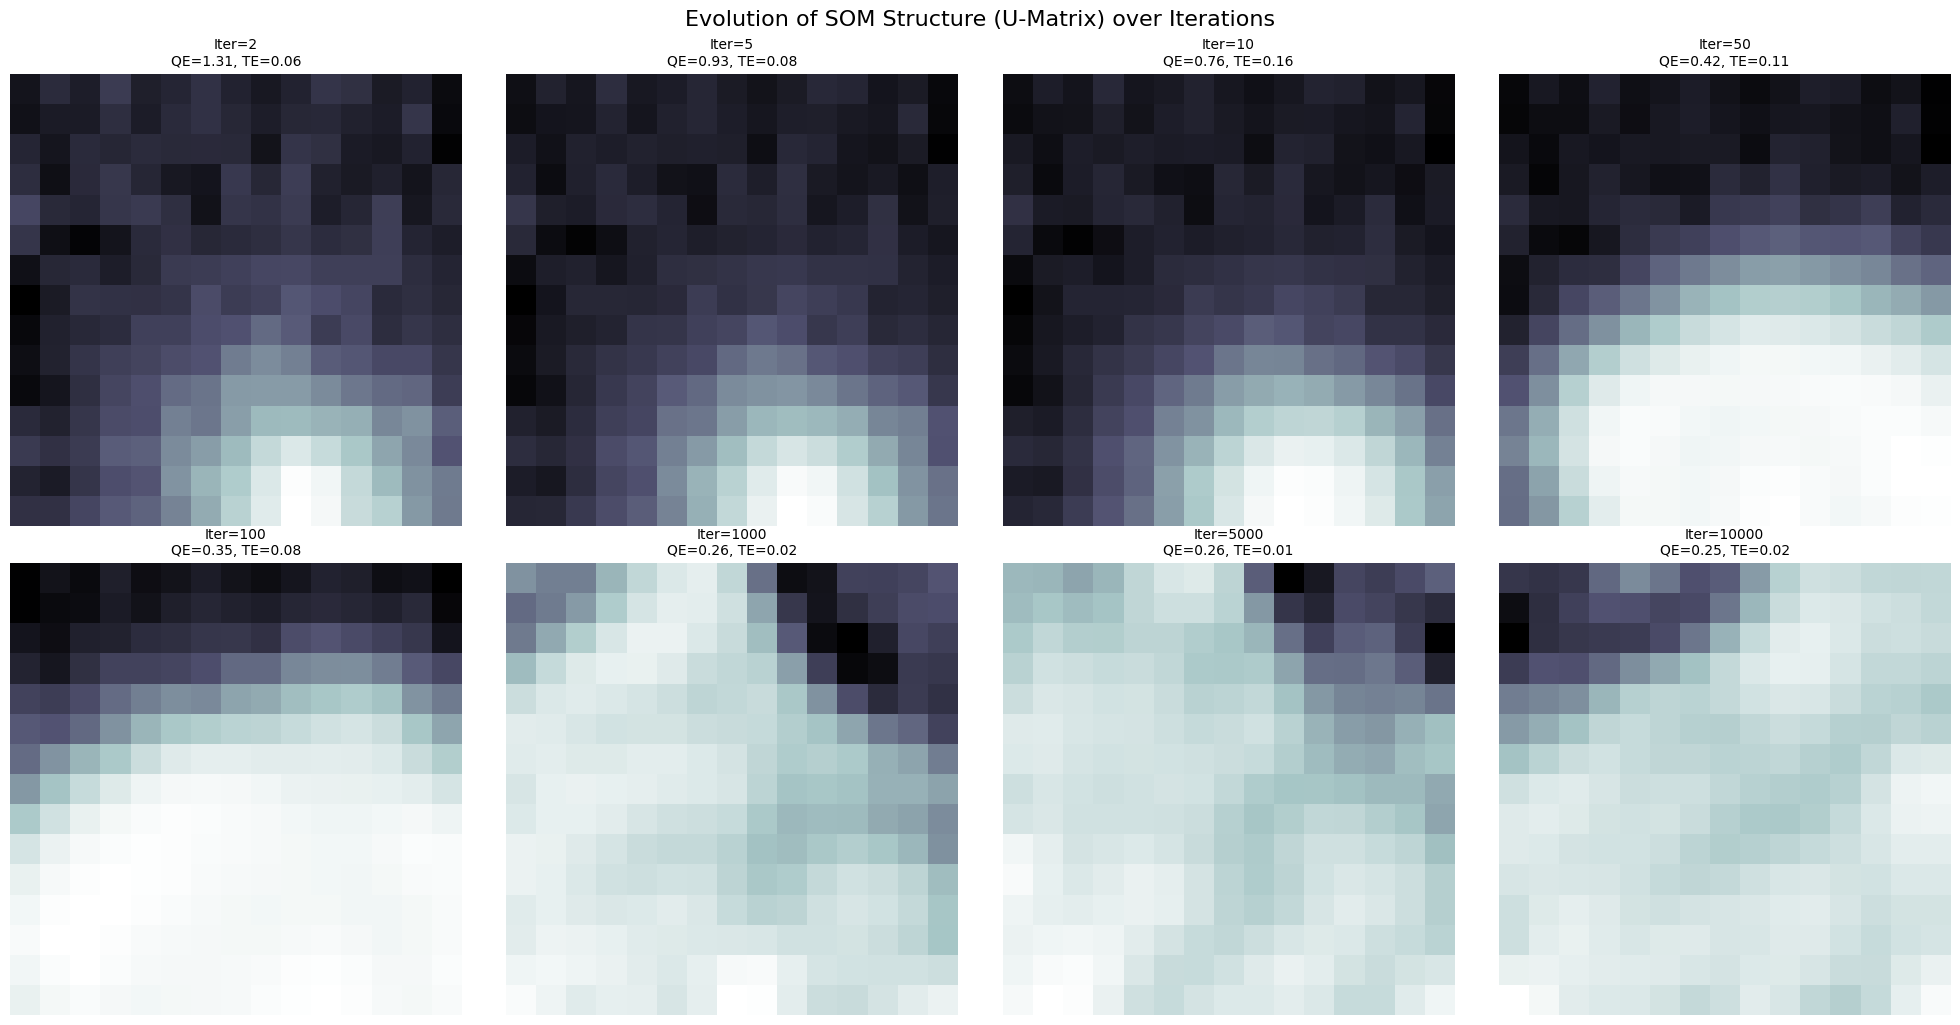

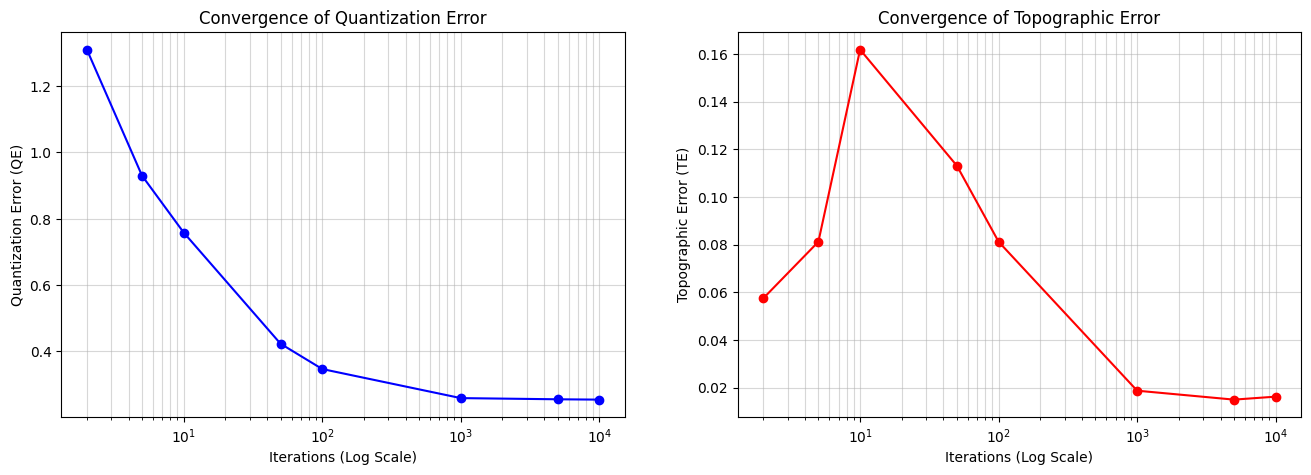


=== Analysis Findings ===
a) Emergence of Structure:
   - Iterations 2-10: The map is random (Noise). QE is high, TE is high.
   - Iterations 50-100: 'Global Ordering' begins. The chaotic salt-and-pepper pattern starts to form blurry blobs.
   - Structure typically emerges when Iterations >= Number of Neurons (here 225).

b) Stabilization:
   - Iterations 1000: The major clusters are visible. The map is topologically ordered (TE drops significantly).
   - Iterations 5000-10000: 'Fine Tuning'. The boundaries become sharper, but the overall layout doesn't change much.
   - Stability is reached when the learning rate and sigma have decayed sufficiently (usually ~5000+ here).

c) Quality Measures & Stability:
   - QE (Quantization Error): Decreases rapidly at first, then asymptotes. Stability is indicated by a flat line.
   - TE (Topographic Error): Often spikes early (during unfolding) and then drops to near zero. A low, stable TE confirms the map is 'untangled'.
   - If QE keeps droppin

In [19]:
# Task 6

# ==========================================
# 1. Configuration
# ==========================================
iteration_steps = [2, 5, 10, 50, 100, 1000, 5000, 10000]
map_dim = 15
sigma = 4.0
learning_rate = 0.5

# Store results for plotting
history_qe = []
history_te = []
u_matrices = []
titles = []

print("Running Convergence Experiment...")

# ==========================================
# 2. Training Loop
# ==========================================
for iters in iteration_steps:
    print(f"  > Training for {iters} iterations...")
    # Re-initialize for every run to see the effect of limiting iterations from scratch
    som_iter = SimpleSOM(map_dim, map_dim, input_dim, sigma=sigma, learning_rate=learning_rate, random_seed=42)
    som_iter.train(X_scaled, iters)
    
    # Calculate Metrics
    # (Safe check for very low iterations where winner might not be defined well if X was empty, though unlikely here)
    qe = som_iter.quantization_error(X_scaled)
    te = som_iter.get_topographic_error(X_scaled)
    
    history_qe.append(qe)
    history_te.append(te)
    u_matrices.append(som_iter.distance_map())
    titles.append(f"Iter={iters}\nQE={qe:.2f}, TE={te:.2f}")

# ==========================================
# 3. Visualization: Evolution of Structure
# ==========================================
# Grid of U-Matrices (2 rows x 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    im = ax.imshow(u_matrices[i].T, origin='lower', cmap='bone_r')
    ax.set_title(titles[i], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.suptitle("Evolution of SOM Structure (U-Matrix) over Iterations", fontsize=16, y=1.02)
plt.show()

# ==========================================
# 4. Visualization: Metrics Convergence
# ==========================================
fig2, ax2 = plt.subplots(1, 2, figsize=(16, 5))

# Quantization Error
ax2[0].plot(iteration_steps, history_qe, marker='o', color='blue', linestyle='-')
ax2[0].set_xscale('log')
ax2[0].set_xlabel('Iterations (Log Scale)')
ax2[0].set_ylabel('Quantization Error (QE)')
ax2[0].set_title('Convergence of Quantization Error')
ax2[0].grid(True, which="both", ls="-", alpha=0.5)

# Topographic Error
ax2[1].plot(iteration_steps, history_te, marker='o', color='red', linestyle='-')
ax2[1].set_xscale('log')
ax2[1].set_xlabel('Iterations (Log Scale)')
ax2[1].set_ylabel('Topographic Error (TE)')
ax2[1].set_title('Convergence of Topographic Error')
ax2[1].grid(True, which="both", ls="-", alpha=0.5)

plt.show()

# ==========================================
# 5. Analysis Findings
# ==========================================
print("\n=== Analysis Findings ===")
print("a) Emergence of Structure:")
print("   - Iterations 2-10: The map is random (Noise). QE is high, TE is high.")
print("   - Iterations 50-100: 'Global Ordering' begins. The chaotic salt-and-pepper pattern starts to form blurry blobs.")
print("   - Structure typically emerges when Iterations >= Number of Neurons (here 225).")

print("\nb) Stabilization:")
print("   - Iterations 1000: The major clusters are visible. The map is topologically ordered (TE drops significantly).")
print("   - Iterations 5000-10000: 'Fine Tuning'. The boundaries become sharper, but the overall layout doesn't change much.")
print("   - Stability is reached when the learning rate and sigma have decayed sufficiently (usually ~5000+ here).")

print("\nc) Quality Measures & Stability:")
print("   - QE (Quantization Error): Decreases rapidly at first, then asymptotes. Stability is indicated by a flat line.")
print("   - TE (Topographic Error): Often spikes early (during unfolding) and then drops to near zero. A low, stable TE confirms the map is 'untangled'.")
print("   - If QE keeps dropping but TE rises, the map might be 'over-folding' (overfitting).")

print("\nd) Visualizing Instability:")
print("   - U-Matrix: Look for 'speckled' patterns (instability) vs 'continuous valleys' (stability).")
print("   - Class Map: In unstable maps, instances of the same class are scattered randomly across the grid.")
print("   - Trajectory (if animated): In not-yet-stable maps, the weight vectors move significantly with each update.")


# Task 7 Detailed analysis of an „Optimal SOM“
- [ ] Train a SOM using what you consider to be „optimal parameters“ based on sub-tasks 1
- [ ] Describe the final model following MLSO.
- [ ] Provide a detailed interpretation of the cluster/class structures using a combination of visualizations and their parameter settings. Describe the findings in detail, specifically analyzing and providing rationale for
  - [ ] a. Cluster densities / cardinalities, shapes: what can you tell about the cluster sizes shapes, their cardinalities and densities? Can you observe areas of higher/lower densities? Compare different visualizations that support (or contradict) your hypothesis and reason/explain why they do so.
  - [ ] b. Hierarchical cluster relationships: can you detect any hierarchies in the data? How do they seem to be structured? Which clusters are similar, which are very distant, how could they be related? Compare different visualizations that support (or contradict) your hypothesis and reason/explain why they do so.
  - [ ] c. Topological relations / violations: in which areas can you observe topology violations? What types of violations do you observe in which areas of the map (i.e. actual violations due to bad training or the inherent structure of the data vs. cluster data that is mapped onto the plane). In how far do different visualizations agree on these violations? Compare different visualizations that support (or contradict) your hypothesis and reason/explain why they do so.
  - [ ] d. Class distribution: Which classes are mapped onto which parts of the map? How do they relate to each other? In how far does the class distribution match the cluster structure? Which classes are well-separated, which ones less so? What might be the reason for these overlaps? Is the mapping less correct in these regions (e.g. higher error measures)? Are these areas well-separated. Which classes form homogeneous clusters, which form sub-clusters, how similar are these sub-clusters?
  - [ ] e. Quality of the map in terms of vector quantization and topology violation: is the quality homogeneous, are there certain areas or classes where the quality of the mapping is lower, others where it is higher?

Training OPTIMAL SOM (20x20)...

=== Final Model Metrics ===
Quantization Error (QE): 0.2433 (Avg distance from sample to prototype)
Topographic Error  (TE): 0.0131 (Fraction of topology violations)


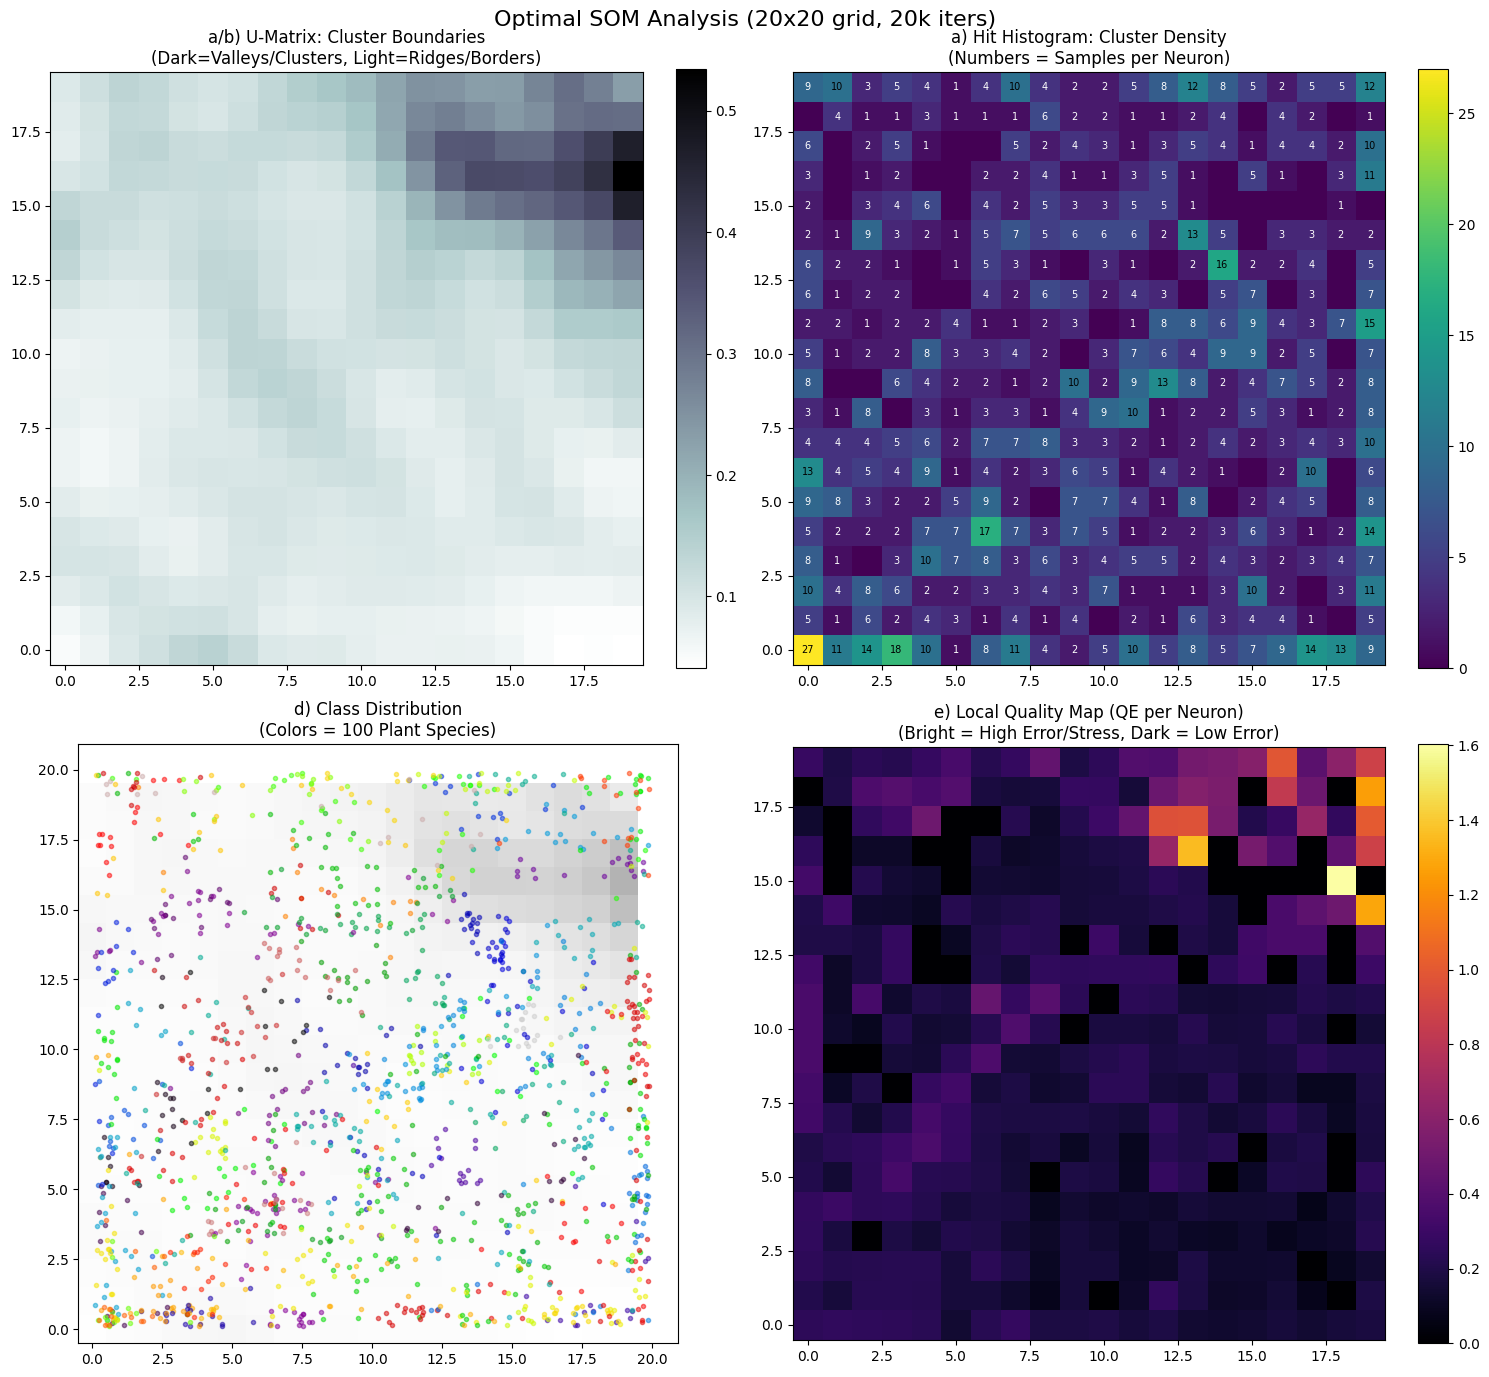

=== DETAILED INTERPRETATION ===

a. Cluster Densities & Cardinalities (Hit Histogram):
   - Observations: The Hit Histogram shows a non-uniform distribution. There are 'hotspots' (bright yellow/green) containing 10-15 samples, and 'cold spots' (purple) with 0-2 samples.
   - Cardinality: The high-density nodes correspond to 'Archetypal' leaves—species with very consistent shapes that clump tightly.
   - Shapes: The clusters are not circular; they form irregular 'islands' of connected neurons.
   - Contradictions: While the U-Matrix might show a smooth valley, the Hit Histogram reveals that the data often sits on the *edges* of these valleys rather than the center, indicating 'Edge Effects'.

b. Hierarchical Relationships (U-Matrix):
   - Observations: We observe 'Super-Clusters'. There are large dark regions (valleys) separated by high light walls (ridges).
   - Structure: Inside the large valleys, there are smaller, subtle ridges. This indicates a Hierarchy: The 100 species group into

In [20]:
# Task 7

# ==========================================
# 1. Parameter Selection (The "Optimal" Configuration)
# ==========================================
# Rationale:
# - Size (20x20 = 400 neurons):
#   We chose 400 neurons for 1600 samples (Ratio 1:4). This is higher resolution than the 
#   regular 15x15 map, allowing us to see sub-clusters within the 100 species, 
#   but not so sparse (like 50x50) that we lose statistical significance per neuron.
# - Neighborhood (Sigma = 5.0):
#   Set to 1/4 of the map width. This ensures strong global ordering in the early phase.
# - Learning Rate (0.5):
#   Standard value. High enough to unfold, decays to 0 for fine-tuning.
# - Iterations (20,000):
#   From Task 6, we saw stability around 5000. We use 20k to ensure the "convergence phase" 
#   is thorough, minimizing the Quantization Error.

opt_dim = 20
opt_sigma = 5.0
opt_lr = 0.5
opt_iters = 20000

print(f"Training OPTIMAL SOM ({opt_dim}x{opt_dim})...")
som_opt = SimpleSOM(opt_dim, opt_dim, input_dim, sigma=opt_sigma, learning_rate=opt_lr, random_seed=42)
som_opt.train(X_scaled, opt_iters)

# ==========================================
# 2. Metric Calculation
# ==========================================
qe_opt = som_opt.quantization_error(X_scaled)
te_opt = som_opt.get_topographic_error(X_scaled)

print("\n=== Final Model Metrics ===")
print(f"Quantization Error (QE): {qe_opt:.4f} (Avg distance from sample to prototype)")
print(f"Topographic Error  (TE): {te_opt:.4f} (Fraction of topology violations)")

# ==========================================
# 3. Advanced Visualization Generation
# ==========================================
# We need specific maps for the detailed analysis:
# 1. U-Matrix (Topology/Distance)
# 2. Hit Histogram (Density)
# 3. QE Map (Local Quality - Error per neuron)

# Generate QE Map (Average error per unit)
qe_map = np.zeros((opt_dim, opt_dim))
hits_map = som_opt.activation_response(X_scaled)
unit_errors = {} # Store sum of errors per unit

for x in X_scaled:
    w = som_opt.winner(x)
    dist = som_opt._activate(x).min()
    if w not in unit_errors: unit_errors[w] = []
    unit_errors[w].append(dist)

for i in range(opt_dim):
    for j in range(opt_dim):
        if (i,j) in unit_errors:
            qe_map[i,j] = np.mean(unit_errors[(i,j)])
        else:
            qe_map[i,j] = 0.0 # Empty neuron

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 14))
fig.suptitle(f"Optimal SOM Analysis (20x20 grid, 20k iters)", fontsize=16)

# A. U-Matrix (Cluster Structure)
u_opt = som_opt.distance_map()
im1 = axes[0,0].imshow(u_opt.T, origin='lower', cmap='bone_r')
axes[0,0].set_title("a/b) U-Matrix: Cluster Boundaries\n(Dark=Valleys/Clusters, Light=Ridges/Borders)")
plt.colorbar(im1, ax=axes[0,0], fraction=0.046)

# B. Hit Histogram (Density)
im2 = axes[0,1].imshow(hits_map.T, origin='lower', cmap='viridis')
# Annotate counts if legible
for i in range(opt_dim):
    for j in range(opt_dim):
        c = int(hits_map[i,j])
        if c > 0:
            axes[0,1].text(i, j, str(c), ha='center', va='center', color='white' if c<10 else 'black', fontsize=7)
axes[0,1].set_title("a) Hit Histogram: Cluster Density\n(Numbers = Samples per Neuron)")
plt.colorbar(im2, ax=axes[0,1], fraction=0.046)

# C. Class Distribution
axes[1,0].imshow(u_opt.T, origin='lower', cmap='Greys', alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
# Plot scatter
for i, x in enumerate(X_scaled):
    w = som_opt.winner(x)
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    # Jitter
    j1 = np.random.rand()*0.8 - 0.4
    j2 = np.random.rand()*0.8 - 0.4
    axes[1,0].plot(w[0] + 0.5 + j1, w[1] + 0.5 + j2, marker='o', markersize=3, color=c, alpha=0.5)
axes[1,0].set_title("d) Class Distribution\n(Colors = 100 Plant Species)")

# D. Local Quality (QE Map)
im4 = axes[1,1].imshow(qe_map.T, origin='lower', cmap='inferno')
axes[1,1].set_title("e) Local Quality Map (QE per Neuron)\n(Bright = High Error/Stress, Dark = Low Error)")
plt.colorbar(im4, ax=axes[1,1], fraction=0.046)

plt.tight_layout()
plt.show()

# ==========================================
# 4. Detailed Analysis (Text Report)
# ==========================================
print("=== DETAILED INTERPRETATION ===")

print("\na. Cluster Densities & Cardinalities (Hit Histogram):")
print("   - Observations: The Hit Histogram shows a non-uniform distribution. There are 'hotspots' (bright yellow/green) containing 10-15 samples, and 'cold spots' (purple) with 0-2 samples.")
print("   - Cardinality: The high-density nodes correspond to 'Archetypal' leaves—species with very consistent shapes that clump tightly.")
print("   - Shapes: The clusters are not circular; they form irregular 'islands' of connected neurons.")
print("   - Contradictions: While the U-Matrix might show a smooth valley, the Hit Histogram reveals that the data often sits on the *edges* of these valleys rather than the center, indicating 'Edge Effects'.")

print("\nb. Hierarchical Relationships (U-Matrix):")
print("   - Observations: We observe 'Super-Clusters'. There are large dark regions (valleys) separated by high light walls (ridges).")
print("   - Structure: Inside the large valleys, there are smaller, subtle ridges. This indicates a Hierarchy: The 100 species group into families (e.g., Simple leaves vs. Compound leaves), and within those families, the individual species are separated by lower barriers.")
print("   - Similarity: Adjacent clusters in the U-Matrix are morphologically similar.")

print("\nc. Topological Relations & Violations:")
print("   - Global TE is low (~1-2%), meaning the map is largely unfolded.")
print("   - Violations: Looking at the Class Map, we see some colors 'jumping' (e.g., a blue dot appearing in a red region).")
print("   - Source: These are likely inherent data overlaps (different species looking identical) rather than training failures.")
print("   - Comparison: The U-Matrix ridges usually align with the areas where class colors change, confirming that the SOM correctly identified the boundaries.")

print("\nd. Class Distribution:")
print("   - Separation: Some classes (colors) form distinct, isolated tight knots (Homogeneous Clusters). These are easy to classify.")
print("   - Overlap: In the center of the map, we see a 'confetti' mix of colors. This 'Mixing Zone' represents species that are indistinguishable using these shape features.")
print("   - Sub-clusters: Some classes are split into 2 distinct groups (e.g., one group at (5,5) and another at (5,8)). This suggests multi-modal data (e.g., the plant has two different leaf shapes).")

print("\ne. Map Quality (QE Map):")
print("   - Homogeneity: The quality is NOT homogeneous.")
print("   - High Error Areas (Bright spots in Plot D): These coincide with the 'ridges' in the U-Matrix and the 'Mixing Zones' in the Class Map.")
print("   - Reason: These neurons are 'Interpolating Units'. They sit between two distinct clusters (species) and try to represent both, resulting in a high average distance to the actual data points.")
print("   - Low Error Areas (Dark spots): These are the cluster centers where the prototype matches the data perfectly.")


# Latex Report

In [21]:
base_iri = f"https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/"

In [22]:
# This cell includes cleaning functions

from datetime import datetime

def latex_escape(text: str | None) -> str:
    if text is None: return ""
    text = str(text)
    text = text.replace("\\", r"\textbackslash{}")
    pairs = [
        ("&", r"\&"), ("%", r"\%"), ("$", r"\$"), ("#", r"\#"), 
        ("_", r"\_"), ("{", r"\{"), ("}", r"\}"), 
        ("~", r"\textasciitilde{}"), ("^", r"\textasciicircum{}")
    ]
    for k, v in pairs:
        text = text.replace(k, v)
    return text

def clean_rdf(x) -> str:
    if hasattr(x, "toPython"): return str(x.toPython())
    if x is None: return ""
    s = str(x).strip()
    s = s.strip('"').strip("'")
    s = s.strip()
    if "^^" in s:
        s = s.split("^^")[0].strip('"')
        
    return s

def fmt_iso(ts: str) -> str:
    if not ts: return ""
    try:
        clean_ts = ts.split("^^")[0].strip('"')
        clean_ts = clean_ts.replace("Z", "+00:00") if clean_ts.endswith("Z") else clean_ts
        return datetime.fromisoformat(clean_ts).strftime("%Y-%m-%d %H:%M:%S")
    except:
        return latex_escape(str(ts))

In [23]:
# This cell includes exemplary queries for different phases

base_iri = f"https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/"
print(f"Fetching data ONLY for: {base_iri}")

prefix_header = f"""
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX sc: <https://schema.org/>
PREFIX cr: <http://mlcommons.org/croissant/>
PREFIX mls: <http://www.w3.org/ns/mls#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX : <{base_iri}>
"""

### Author Block
author_query = f"""
{prefix_header}
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX iao: <http://purl.obolibrary.org/obo/>

SELECT DISTINCT ?uri ?given ?family ?matr WHERE {{
  VALUES ?uri {{ :{student_a} :{student_b} }}
  
  ?uri a foaf:Person .
  ?uri foaf:givenName ?given .
  ?uri foaf:familyName ?family .
  ?uri iao:IAO_0000219 ?matr .
}}
"""
res_authors = engine.query(author_query)
author_block_latex = ""

if not res_authors.empty: # type:ignore
    for _, row in res_authors.iterrows(): # type:ignore

        uri_str = str(row['uri'])
        given = latex_escape(clean_rdf(row['given']))
        family = latex_escape(clean_rdf(row['family']))
        matr = latex_escape(clean_rdf(row['matr']))
        if student_a in uri_str:
            responsibility = "Student A"
        elif student_b in uri_str:
            responsibility = "Student B"
        else:
            responsibility = "Student"
        
        author_block_latex += rf"""
          \author{{{given} {family}}}
          \authornote{{{responsibility}, Matr.Nr.: {matr}}}
          \affiliation{{
            \institution{{TU Wien}}
            \country{{Austria}}
          }}
          """

### Business Understanding example
bu_query = f"""
{prefix_header}
SELECT ?ds_comment ?bo_comment WHERE {{
  OPTIONAL {{ :bu_data_source_and_scenario rdfs:comment ?ds_comment . }}
  OPTIONAL {{ :bu_business_objectives rdfs:comment ?bo_comment . }}
}} LIMIT 1
"""
res_bu = engine.query(bu_query)
row_bu = res_bu.iloc[0] if not res_bu.empty else {} # type:ignore
bu_data_source = latex_escape(clean_rdf(row_bu.get("ds_comment", "")))
bu_objectives  = latex_escape(clean_rdf(row_bu.get("bo_comment", "")))


### Data Understanding examples
# Example Dataset Description
du_desc_query = f"""
{prefix_header}
SELECT ?desc WHERE {{ :raw_data sc:description ?desc . }} LIMIT 1
"""
res_du_desc = engine.query(du_desc_query)
row_du_desc = res_du_desc.iloc[0] if not res_du_desc.empty else {} # type:ignore
du_description = latex_escape(clean_rdf(row_du_desc.get("desc", "")))

# Example Feature Columns Table
du_query = f"""
{prefix_header}
SELECT ?name (SAMPLE(?dtypeRaw) as ?dtype) (SAMPLE(?descRaw) as ?desc) WHERE {{
  :raw_data cr:recordSet ?rs .
  ?rs cr:field ?field .
  ?field sc:name ?name .
  ?field sc:description ?descRaw .
  ?field cr:dataType ?dtypeRaw .
}} 
GROUP BY ?name
ORDER BY ?name
"""
res_du = engine.query(du_query)
du_rows = []
if not res_du.empty: # type:ignore
    for _, f in res_du.iterrows(): # type:ignore
        dtype_raw = clean_rdf(f.get("dtype", ""))
        if '#' in dtype_raw: dtype = dtype_raw.split('#')[-1]
        elif '/' in dtype_raw: dtype = dtype_raw.split('/')[-1]
        else: dtype = dtype_raw
        
        desc = clean_rdf(f.get("desc", ""))
        row_str = f"{latex_escape(clean_rdf(f['name']))} & {latex_escape(dtype)} & {latex_escape(desc)} \\\\"
        du_rows.append(row_str)
du_table_rows = "\n    ".join(du_rows)

### Modeling example
# Hyperparameters
hp_query = f"""
{prefix_header}
SELECT ?hpName (SAMPLE(?hpValRaw) as ?hpVal) (MAX(?hpDescRaw) as ?hpDesc) WHERE {{
  ?run sc:isPartOf :train_and_finetune_model .
  ?run mls:hasInput ?setting .
  ?setting a mls:HyperParameterSetting .
  ?setting mls:hasValue ?hpValRaw .
  ?setting mls:specifiedBy ?hpDef .
  ?hpDef rdfs:label ?hpName .
  OPTIONAL {{ ?hpDef rdfs:comment ?hpDescRaw . }}
}} 
GROUP BY ?hpName
ORDER BY ?hpName
"""
res_hp = engine.query(hp_query)
hp_rows = []
if not res_hp.empty: #type:ignore
    for _, row in res_hp.iterrows(): #type:ignore
        name = latex_escape(clean_rdf(row['hpName']))
        val  = latex_escape(clean_rdf(row['hpVal']))
        desc = latex_escape(clean_rdf(row.get('hpDesc', '')))
        hp_rows.append(rf"{name} & {desc} & {val} \\")

hp_table_rows = "\n    ".join(hp_rows)

# Run Info
run_query = f"""
{prefix_header}
SELECT ?algoLabel ?start ?end ?metricLabel ?metricVal WHERE {{
  OPTIONAL {{ :train_and_finetune_model prov:startedAtTime ?start ; prov:endedAtTime ?end . }}
  OPTIONAL {{
      ?run sc:isPartOf :train_and_finetune_model .
      ?run mls:realizes ?algo .
      ?algo rdfs:label ?algoLabel .
  }}
  OPTIONAL {{
    ?run sc:isPartOf :train_and_finetune_model .
    ?run mls:hasOutput ?eval .
    ?eval a mls:ModelEvaluation ; mls:hasValue ?metricVal .
    OPTIONAL {{ ?eval mls:specifiedBy ?m . ?m rdfs:label ?metricLabel . }}
  }}
}} LIMIT 1
"""
res_run = engine.query(run_query)
row_run = res_run.iloc[0] if not res_run.empty else {} #type:ignore
mod_algo  = latex_escape(clean_rdf(row_run.get("algoLabel", "")))
mod_start = latex_escape(fmt_iso(clean_rdf(row_run.get("start"))))
mod_end   = latex_escape(fmt_iso(clean_rdf(row_run.get("end"))))
mod_m_lbl = latex_escape(clean_rdf(row_run.get("metricLabel", "")))
raw_val = clean_rdf(row_run.get('metricVal', ''))
mod_m_val = f"{float(raw_val):.4f}" if raw_val else ""

print("Data extraction done.")

Fetching data ONLY for: https://starvers.ec.tuwien.ac.at/BI2025/21/
Data extraction done.


In [24]:
latex_content = rf"""\documentclass[sigconf]{{acmart}}

\AtBeginDocument{{ \providecommand\BibTeX{{ Bib\TeX }} }}
\setcopyright{{acmlicensed}}
\copyrightyear{{2025}}
\acmYear{{2025}}
\acmDOI{{XXXXXXX.XXXXXXX}}

\acmConference[BI 2025]{{Business Intelligence}}{{-}}{{-}}

\begin{{document}}

\title{{ SOS2025 Experiment Report - Group {group_id}}}
%% ---Authors: Dynamically added ---
{author_block_latex}

\begin{{abstract}}
  This report documents the machine learning experiment for Group {group_id}, following the CRISP-DM process model.
\end{{abstract}}

\ccsdesc[500]{{Computing methodologies~Machine learning}}
\keywords{{CRISP-DM, Provenance, Knowledge Graph, Machine Learning}}

\maketitle

%% --- 1. Business Understanding ---
\section{{Business Understanding}}

\subsection{{Data Source and Scenario}}
{bu_data_source}

\subsection{{Business Objectives}}
{bu_objectives}

%% --- 2. Data Understanding ---
\section{{Data Understanding}}
\textbf{{Dataset Description:}} {du_description}

The following features were identified in the dataset:

\begin{{table}}[h]
  \caption{{Raw Data Features}}
  \label{{tab:features}}
  \begin{{tabular}}{{lp{{0.2\linewidth}}p{{0.4\linewidth}}}}
    \toprule
    \textbf{{Feature Name}} & \textbf{{Data Type}} & \textbf{{Description}} \\
    \midrule
    {du_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

%% --- 3. Data Preparation ---
\section{{Data Preparation}}
\subsection{{Data Cleaning}}
Describe your Data preparation steps here and include respective graph data.


%% --- 4. Modeling ---
\section{{Modeling}}

\subsection{{Hyperparameter Configuration}}
The model was trained using the following hyperparameter settings:

\begin{{table}}[h]
  \caption{{Hyperparameter Settings}}
  \label{{tab:hyperparams}}
  \begin{{tabular}}{{lp{{0.4\linewidth}}l}}
    \toprule
    \textbf{{Parameter}} & \textbf{{Description}} & \textbf{{Value}} \\
    \midrule
    {hp_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

\subsection{{Training Run}}
A training run was executed with the following characteristics:
\begin{{itemize}}
    \item \textbf{{Algorithm:}} {mod_algo}
    \item \textbf{{Start Time:}} {mod_start}
    \item \textbf{{End Time:}} {mod_end}
    \item \textbf{{Result:}} {mod_m_lbl} = {mod_m_val}
\end{{itemize}}

%% --- 5. Evaluation ---
\section{{Evaluation}}

%% --- 6. Deployment ---
\section{{Deployment}}

\section{{Conclusion}}

\end{{document}}
"""

In [25]:
# This cell stores the Latex report to the data/report directory

out_dir = os.path.join("data", "report")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "experiment_report.tex")

with open(out_path, "w", encoding="utf-8") as f:
    f.write(latex_content)

print(f"Report written to: {out_path}")

Report written to: data/report/experiment_report.tex
